# Chest X-Ray (*Pneumonia Prediction*) - CNN & Transfer Learning

![Title Image](./title_img.png)

## Goal:
<sub>Apply Convolutional Neural Networks (CNNs) to Chest X-Ray images to discern patients with Pneumonia.</sub>

* Utilize state-of-the-art Convolutional Neural Networks (CNNs) for the purpose of detecting pneumonia in Chest X-Ray images.
* The primary objective is to develop a robust and accurate model capable of distinguishing between X-Ray scans of patients with pneumonia and those without.
* This undertaking involves careful consideration of data preprocessing, model architecture selection, and thorough evaluation methods.
* The ultimate aim is to contribute to improved diagnostic tools for pneumonia through the application of advanced deep learning techniques.

## Approach:
* Notebook is written in a systematic way for easy understanding.
* The notebook dynamically splits the train set into training and validation sets.
*  I have defined and used functions where ever possible, to try and automate tasks.
*  For a detailed view of the core implementation, jump to index option 5.

## <u>I will utilize three distinct approaches for image classification:</u>

### 1. Simple CNN:
* Develop a straightforward Convolutional Neural Network for image classification.  

### 2. Transfer Learning:
* Implement Transfer Learning by utilizing a pretrained model with frozen layers.
* Use the pretrained model as a basis for feature extraction.   

### 3. Fine Tuning:
* Fine-tune the model by unfreezing the last layers of the pretrained model.
* This approach aims to adapt the model to the specific characteristics of the pneumonia dataset.

## Interactive Index
* Navigation: Clickable Links

1. [About Dataset](#1 "Dataset Description, Problem statements").
2. [Library Imports](#2 "Libraries Imported and used in this project").
3. [Functions Used](#3 "Functions Created and used in this project").
    * [Time to run](#3.1 "Notebook efficiency").
    * [Model Performance visualization](#3.2 "Comapare and plot").
    * [Basic image handling](#3.3 "Load/Preprocess/Display").
    * [Lime](#3.4 "Local Interpretable Model-agnostic Explanations").
    * [Functions to create object/instance of various models](#3.5 "Building Models").
        * [Custom CNN](#3.5.1 "From Scratch").
        * [Transfer learning](#3.5.2 "Transfer learning").
        * [Saving models](#3.5.3 "Finding epoch number after early stopping").
4. [Initializing/Configuring](#4)
   * [Notebook environment](#4.1 "Initializing environment variables and data generators")
   * [GPU](#4.2 "Configuring and confirming tensorflow with GPU")
5. [Loading Paths & Labels](#5 "Reading Image data paths and labels and storing in our DataFrames").
6. [EDA](#6 "Exploratory Data Analysis").
    * [Distribution of classes](#6.1 "Checking for imbalance").
    * [Sample X-Rays](#6.2 "Viewing a few samples").
7. [Creating validation split](#7 "Using Train Test Split").
8. [Preprocessing and Loading Image data](#8 "Preparing Data for the models").
9. [Creating and training the image classification models.](#9 "Building models").
    * [Custom CNN](#9.1 "Building our first model").
    * [Transfer Learning & Fine-Tuning](#9.2 "Trying out different transfer learning models from keras").
        * [ResNet](#9.2.1 "Residual Network V2: 152 layers").
            * [Base](#9.2.1.1 "trainable=False, Frozen layers")
            * [Fine-Tuned](#9.2.1.2 "trainable=True/ Un-freezing last 13 layers")
        * [DenseNet201](#9.2.2 "Densely Connected Convolutional Networks: 201 layers").
            * [Base model](#9.2.2.1 "trainable=False, Frozen layers")
            * [Fine-Tuned model](#9.2.2.2 "trainable=True/ Un-freezing last 13 layers")
        * [InceptionV3](#9.2.3 "Inception-V3: 48 layers").
            * [Base model](#9.2.3.1 "trainable=False, Frozen layers")
            * [Fine-Tuned model](#9.2.3.2 "trainable=True/ Un-freezing last 50 layers")
        * [MobileNetV2](#9.2.4 "MobileNet-V2: 53 layers").
            * [Base model](#9.2.4.1 "trainable=False, Frozen layers")
            * [Fine-Tuned model](#9.2.4.2 "trainable=True/ Un-freezing last 20 layers")
        * [VGG16](#9.2.5 "Visual Geometry Group 16 layers")
            * [Base model](#9.2.5.1 "trainable=False, Frozen layers")
            * [Fine-Tuned model](#9.2.5.2 "trainable=True/ Un-freezing last 10 layers")
10. [Metrics for our Fine-Tuned/pre-trained models](#10 "Evaluating Performance")
    * [Defining model dictionary](#10.1 "Defining a dictionary containing model names and their respectine fine-tuned models")
    * [Comparing Confusion matrices & Classification reports](#10.2 "Plotting heatmaps for confusion matrix and printing classification reports")
    * [Comparing ROC-AUC Curves & Metrics dictionary](#10.3 "Plotting ROC-AUC Curves & Creating metrics dictionary")
    * [Comparing Accuracies and ROC-AUC scores](#10.4 "Comparing Accuracies scores and ROC-AUC scores")
    * [Choosing the best model](#10.5 "Comparing & Plotting metrics")
11. [Lime Predictions and explainations](#11 "Using our UD functions to display lime predictions/explainations/segmented Images")
12. [Saving the fine-tuned models on disk](#12 "")
13. [References](#13 "")
14. [END](#14 "Notebook Execution Time")

<a name='1'></a>
## About Dataset

The dataset, consists of separate folders for the train and test sets.  

This dataset contains 5,856 validated Chest X-Ray images. The images are split into a training set and a testing set of independent patients. Images are labeled as (disease:NORMAL/BACTERIA/VIRUS)-(randomized patient ID)-(image number of a patient).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

<a name='2'></a>
## Library Imports.

In [1]:
# Time to run
import time
start_time = time.time()

# Basic libraries
import pandas as pd
import numpy as np
import random
from numpy.random import seed
import os
import glob

# Visualisation
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke
%matplotlib inline

# Preprocessing and Pretraining
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Managing Image data
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
import cv2
from PIL import Image

# Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import VGG16
from tensorflow.random import set_seed

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc

## Lime(Local Interpretable Model-agnostic Explanations)
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Saving and Loading models (in ".hd5" format)
from tensorflow.keras.models import load_model, save_model

# Setting/Configuring options

## Display options
pd.options.display.max_colwidth = 100

## Warnings
import warnings
warnings.filterwarnings('ignore')

## Hash/Seed/Reproducibility
os.environ['PYTHONHASHSEED'] = str(10)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
seed(10)
random.seed(10)
set_seed(10)

## Muting unnecessary output
from contextlib import redirect_stdout
import io
import sys

<a name='3'></a>
## Functions used.

<a name='3.1'></a>
### Time to run

In [2]:
# Function to Calculate time to run and display in minutes & seconds
def calculate_execution_time(start_time, end_time):
    execution_time = end_time - start_time  # Time in seconds
    hours, remainder = divmod(execution_time, 3600)  # Extracting hours
    minutes, seconds = divmod(remainder, 60)  # Extracting minutes and seconds
    return f"Execution time: {int(hours)} hours, {int(minutes)} minutes, and {seconds:.2f} seconds"

<a name='3.2'></a>
### Model Performance & visualization

In [3]:
def plot_performance(history):
    """
    Plot the learning curve (loss and accuracy) based on the provided training history(Epochs).

    Parameters:
    - history (keras.callbacks.History): Training history from model training.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Plot Loss Curve
    ax1.plot(history.epoch, history.history['loss'], label='Train')
    ax1.plot(history.epoch, history.history['val_loss'], label='Validation')
    ax1.set_title('Learning Curve (Loss)')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(0, 0.5)
    ax1.legend()

    # Plot Accuracy Curve
    ax2.plot(history.epoch, history.history['binary_accuracy'], label='Train')
    ax2.plot(history.epoch, history.history['val_binary_accuracy'], label='Validation')
    ax2.set_title('Learning Curve (Accuracy)')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(0.80, 1.0)
    ax2.legend()

    plt.show()

# Function to calculate and plot the metrics
def compare_metrics(model):
    """
    Compare and plot metrics for a model on validation and test sets.

    Parameters:
    - model (keras.Model): The trained model.

    Returns:
    - tuple: Tuple containing validation loss, validation accuracy, test loss, and test accuracy.
    """
    # Evaluate on the validation set
    val_score = model.evaluate(ds_val, steps=len(val_df) / BATCH, verbose=0)
    val_loss, val_accuracy = val_score[0], val_score[1]

    # Evaluate on the test set
    test_score = model.evaluate(ds_test, steps=len(df_test), verbose=0)
    test_loss, test_accuracy = test_score[0], test_score[1]

    # Print metrics
    print('Validation loss:', val_loss)
    print('Validation accuracy:', val_accuracy)
    print('Test loss:', test_loss)
    print('Test accuracy:', test_accuracy)

    # Plot metrics
    metrics_dict = {'Validation Loss': val_loss, 'Validation Accuracy': val_accuracy,
                    'Test Loss': test_loss, 'Test Accuracy': test_accuracy}

    plt.figure(figsize=(10, 3))
    ax = sns.barplot(x=list(metrics_dict.keys()), y=list(metrics_dict.values()))
    plt.title('Comparison of Metrics')
    plt.ylabel('Metric Value')

    # Display values within the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, -10), textcoords='offset points', color='white')

    plt.show()

    return val_loss, val_accuracy, test_loss, test_accuracy

# Function to add labels with values on top of the bars
def add_value_labels(ax, rects, precision=3):
    for rect in rects:
        height = rect.get_height()
        rounded_value = round(height, precision)
        ax.annotate('{}'.format(rounded_value),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

<a name='3.3'></a>
### Basic image handling

In [4]:
# Function to load and preprocess images
def load_and_preprocess_image(img_path):
    """
    Load, resize, and normalize an image from the given path, and add a batch dimension.

    Parameters:
        img_path (str): The file path to the image.

    Returns:
        numpy.ndarray: The processed image array with an added batch dimension.
    """
    img = cv2.imread(img_path) # Load image using OpenCV
    img = cv2.resize(img, (224, 224)) # Resize image to (224, 224)
    img = img / 255.0 # Normalize pixel values to the range [0, 1]
    return np.expand_dims(img, axis=0) # Add batch dimension to the image array

# Function to create a perturbed version of the image based on the LIME mask
def perturb_image(img, mask):
    """
    Create a perturbed(modified) version of the image by setting selected superpixels to 0 based on the LIME mask.

    Parameters:
        img (numpy.ndarray): The original image array.
        mask (numpy.ndarray): The LIME mask indicating the superpixels to be perturbed.

    Returns:
        numpy.ndarray: The perturbed image array.
    """
    perturbed_img = img.copy()  # Create a copy of the original image
    perturbed_img[mask == 1] = 0  # Set the superpixels in the mask to 0

    return perturbed_img

# Function to display multiple images side by side
def display_side_by_side(images, titles):
    """
    Display multiple images side by side with corresponding titles.

    Parameters:
    - images (list of arrays): List containing the images to be displayed.
    - titles (list of str): List containing the titles for each image.

    Returns:
    None
    """
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].set_title(titles[i])

    plt.show()

<a name='3.4'></a>
### Lime

In [5]:
# Function to display lime predictions
def explain_prediction_lime(model, img_path, class_index=0, num_samples=1000):
    """
    Explain a model's prediction using LIME (Local Interpretable Model-agnostic Explanations).

    Parameters:
    - model (keras.Model): The trained model.
    - img_path (str): Path to the image to be explained.
    - class_index (int): Index of the target class.
    - num_samples (int): Number of samples to generate for LIME.

    Returns:
    - tuple: Tuple containing the LIME segmented image and the LIME explanation.
    """
    # Load and preprocess the image
    img = load_and_preprocess_image(img_path)

    # Save the original stdout
    original_stdout = sys.stdout

    # Create a buffer to capture stdout
    stdout_buffer = io.StringIO()

    # Redirect stdout to the buffer
    with redirect_stdout(stdout_buffer):
        # Define the LIME explainer for image classification
        explainer = lime_image.LimeImageExplainer()
        # Explain the prediction
        explanation = explainer.explain_instance(img[0], model.predict, top_labels=1, hide_color=0, num_samples=num_samples)

    # Get LIME segmented image
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)

    # Create a heatmap from the LIME mask
    lime_segmented_img = mark_boundaries(temp / 2 + 0.5, mask)

    # Access local feature importance values
    exp_list = explanation.local_exp[explanation.top_labels[0]]
    print("LIME Explanation as List:")
    print(exp_list)

    # Get perturbed image
    perturbed_img = perturb_image(img[0], mask)
    perturbed_segmented_img = mark_boundaries(perturbed_img / 2 + 0.5, mask)

    # Display images side by side
    images = [img[0], lime_segmented_img, perturbed_segmented_img]
    titles = ["Original Image", "LIME Segmented Image", "Perturbed Image"]
    display_side_by_side(images, titles)

    # Additional Lime functions
    raw_lime_img = explanation.image
    plt.imshow(raw_lime_img)
    plt.title("Raw Lime Image")
    plt.show()

    superpixel = explanation.segments
    print("Superpixel Positions:")
    print(superpixel)

    # Use lime_image's various functions
    lime_image_functions(explanation)

    return lime_segmented_img, explanation

# Funsction to display lime segmented images
def lime_image_functions(explanation):
    """
    Display LIME image segmentation using matplotlib.

    Parameters:
    - explanation: LIME explanation object.

    Returns:
    None
    """
    segmentation = explanation.segments
    plt.imshow(segmentation, cmap='viridis')
    plt.title("LIME Image Segmentation")
    plt.show()

<a name='3.5'></a>
### Functions to create object/instance of various models

<a name='3.5.1'></a>
#### Custom CNN

In [6]:
# Function to get our first model from scratch (Custom CNN)
def get_model():
    """
    Create a convolutional neural network (CNN) model.

    #Input shape = [width, height, color channels]
    
    Returns:
    keras.Model: CNN model.
    """
    # Input layer
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # Block One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Two
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Three
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)

    # Flattening and passing to a Dense layer
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)

    # Creating and returning the model
    model = keras.Model(inputs=[inputs], outputs=output)

    return model

<a name='3.5.2'></a>
#### Transfer learning models

In [7]:
# Function to build a ResNet 152 V2 model
def get_pretrained_ResNet():
    """
    Create a pretrained ResNet model with a custom head for binary classification.

    #Input shape = [width, height, color channels]

    Returns:
    - model: Keras model with the ResNet base and a custom head for binary classification.
    """
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # Input layer
    x = base_model_ResNet(inputs)

    # Head
    
    # Global average pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Dense layer with ReLU activation
    x = layers.Dense(128, activation='relu')(x)

    # Dropout layer for regularization
    x = layers.Dropout(0.1)(x)

    # Final Dense layer with sigmoid activation for binary classification
    output = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=[inputs], outputs=output)

    return model

# Function to build a DenseNet 201 model
def get_pretrained_densenet():
    """
    Create a pretrained DenseNet model with a custom head for binary classification.

    Returns:
    - model: Keras model with the DenseNet base and a custom head for binary classification.
    """
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = base_model_densenet(inputs)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    output = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs=[inputs], outputs=output)
    return model

# Function to build a Inception V3 model
def get_pretrained_inception():
    """
    Create a pretrained Inception model with a custom head for binary classification.

    Returns:
    - model: Keras model with the Inception base and a custom head for binary classification.
    """
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = base_model_inception(inputs)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    output = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs=[inputs], outputs=output)
    return model

# Function to create MobileNet V2 model
def get_pretrained_mobilenetv2():
    """
    Create a pretrained MobileNetV2 model with a custom head for binary classification.

    Returns:
    - model: Keras model with the MobileNetV2 base and a custom head for binary classification.
    """
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = base_model_mobilenetv2(inputs)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    output = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs=[inputs], outputs=output)

    return model

# Function to create MobileNet V2 model
def get_pretrained_vgg16():
   
    # Create a custom head
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = base_model_vgg16(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    output = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=[inputs], outputs=output)
    
    return model

<a name='3.5.3'></a>
#### Saving models

In [8]:
def find_best_epochs(model_histories, fixed_epoch=None):
    best_epochs = {}

    for model_name, history in model_histories.items():
        # Access the 'loss' values from the history
        loss_values = history.history['loss']
        num_epochs = len(loss_values)

        # If a fixed epoch is provided, use it as the best epoch
        if fixed_epoch is not None:
            best_epoch = fixed_epoch
        else:
            # Use patience from the global early stopping callback
            patience = early_stopping.patience
            # Calculate the epoch number for the best weights
            if num_epochs == patience:
                best_epoch = patience
            else:
                best_epoch = num_epochs - patience

        best_epochs[model_name] = best_epoch

    return best_epochs

<a name='4'></a>
## Initializing/Configuring

<a name='4.1'></a>
### Notebook environment

In [9]:
# Setting global/constant variables
IMG_SIZE = 224
BATCH = 32
EPOCH = 100
SEED = 10
image_path = "chest_xray/test/PNEUMONIA/BACTERIA-40699-0001.jpeg" # Example image path for testing lime

# Setting a color palette
colors_option1 = ["limegreen", "#8B6969"]
colors_option2 = ["#8B6969", "limegreen"]

#Setting callbakcs

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,                                     
    patience = 3,                                   
    min_delt = 1e-7,                                
    cooldown = 0,                               
    verbose = 1
) 

# Creating data generators for Image Augmentation
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  #rotation_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)

<a name='4.1'></a>
### GPU

In [10]:
tf.__version__

'2.10.1'

In [11]:
!nvidia-smi

Tue Feb 20 14:10:13 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.23                 Driver Version: 551.23         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2060 ...  WDDM  |   00000000:26:00.0  On |                  N/A |
|  0%   50C    P8             16W /  175W |     984MiB /   8192MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [12]:
# Get the list of available GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')

print(gpus)

# If GPUs are available, set memory growth for each GPU
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


<a name='5'></a>
## Loading Paths & Labels.

##### **Setting notebook directory/folder**

In [13]:
#os.chdir(notebook_path) # add your notebook path
!dir

 Volume in drive C has no label.
 Volume Serial Number is 4C41-4DF5

 Directory of C:\Users\Kanush\Desktop\Python_AQB_Calculation_Capstone\Capstone 2

02/20/2024  02:09 PM    <DIR>          .
02/20/2024  02:09 PM    <DIR>          ..
02/20/2024  03:32 AM    <DIR>          .ipynb_checkpoints
02/20/2024  02:09 PM         6,171,767 Chest_X-Ray_Pneumonia_Prediction - 100.ipynb
02/19/2024  08:11 PM         8,925,655 Chest_X-Ray_Pneumonia_Prediction - 50-deep-d(best in,mn).ipynb
02/19/2024  02:41 AM         8,881,962 Chest_X-Ray_Pneumonia_Prediction - 50-deep-d-Copy1.ipynb
02/19/2024  02:44 AM         8,884,354 Chest_X-Ray_Pneumonia_Prediction - 50-deep.ipynb
02/16/2024  04:32 AM         8,897,823 Chest_X-Ray_Pneumonia_Prediction - 50-unfreezed.ipynb
02/16/2024  04:32 AM         8,904,609 Chest_X-Ray_Pneumonia_Prediction - 50.ipynb
02/19/2024  02:41 AM         8,809,077 Chest_X-Ray_Pneumonia_Prediction-10-best(vg).ipynb
02/16/2024  04:32 AM         8,783,660 Chest_X-Ray_Pneumonia_Prediction-

##### **Seperating paths for respective Classes**

In [14]:
train_path = "chest_xray/train"
test_path = "chest_xray/test"

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

##### **Loading records into dataframes**

In [15]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

In [16]:
df_train

class                                               image
0        Normal    chest_xray/train/NORMAL\NORMAL-1003233-0001.jpeg
1        Normal    chest_xray/train/NORMAL\NORMAL-1012843-0001.jpeg
2        Normal    chest_xray/train/NORMAL\NORMAL-1014768-0001.jpeg
3        Normal    chest_xray/train/NORMAL\NORMAL-1023731-0001.jpeg
4        Normal    chest_xray/train/NORMAL\NORMAL-1029510-0001.jpeg
...         ...                                                 ...
5227  Pneumonia  chest_xray/train/PNEUMONIA\VIRUS-9934736-0003.jpeg
5228  Pneumonia  chest_xray/train/PNEUMONIA\VIRUS-9947411-0002.jpeg
5229  Pneumonia  chest_xray/train/PNEUMONIA\VIRUS-9962961-0002.jpeg
5230  Pneumonia  chest_xray/train/PNEUMONIA\VIRUS-9963654-0001.jpeg
5231  Pneumonia  chest_xray/train/PNEUMONIA\VIRUS-9975428-0002.jpeg

[5232 rows x 2 columns]

In [17]:
df_test

class                                              image
0       Normal    chest_xray/test/NORMAL\NORMAL-1049278-0001.jpeg
1       Normal    chest_xray/test/NORMAL\NORMAL-1110860-0001.jpeg
2       Normal      chest_xray/test/NORMAL\NORMAL-11419-0001.jpeg
3       Normal     chest_xray/test/NORMAL\NORMAL-115218-0001.jpeg
4       Normal    chest_xray/test/NORMAL\NORMAL-1160949-0001.jpeg
..         ...                                                ...
619  Pneumonia  chest_xray/test/PNEUMONIA\VIRUS-9584831-0001.jpeg
620  Pneumonia  chest_xray/test/PNEUMONIA\VIRUS-9671740-0001.jpeg
621  Pneumonia  chest_xray/test/PNEUMONIA\VIRUS-9783315-0001.jpeg
622  Pneumonia  chest_xray/test/PNEUMONIA\VIRUS-9890836-0001.jpeg
623  Pneumonia  chest_xray/test/PNEUMONIA\VIRUS-9968655-0001.jpeg

[624 rows x 2 columns]

<a name='6'></a>
## EDA

<a name='6.1'></a>
### Distribution of classes
Let's check the target distribution on each set

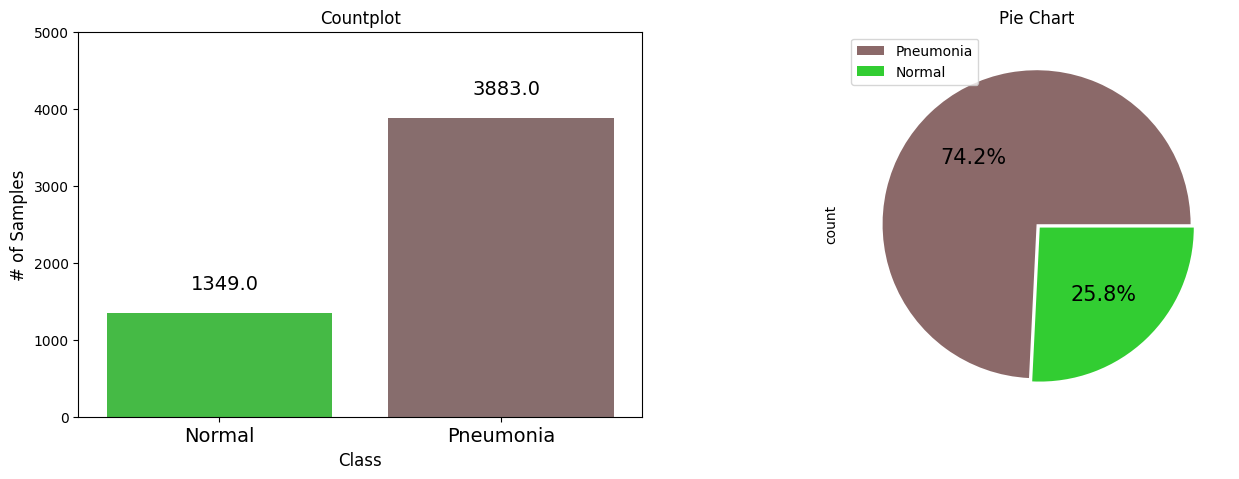

(None,)

In [18]:
# Creating a subplot for the train data
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Countplot
axs[0].set_title("Countplot")
sns.countplot(x='class', data=df_train, palette=colors_option1, ax=axs[0])
axs[0].set_xlabel("Class", fontsize=12)
axs[0].set_ylabel("# of Samples", fontsize=12)
axs[0].set_ylim(0, 5000)
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Normal', 'Pneumonia'], fontsize=14)

for p in axs[0].patches:
    axs[0].annotate((p.get_height()), (p.get_x() + 0.30, p.get_height() + 300), fontsize=14, color='black')

# Plot 2: Pie Chart
axs[1].set_title("Pie Chart")
df_train['class'].value_counts().plot(kind='pie', labels=['', ''], autopct='%1.1f%%', colors=colors_option2, explode=[0, 0.03],
                                      textprops={"fontsize": 15}, ax=axs[1])
axs[1].legend(labels=['Pneumonia', 'Normal'])

plt.show(),

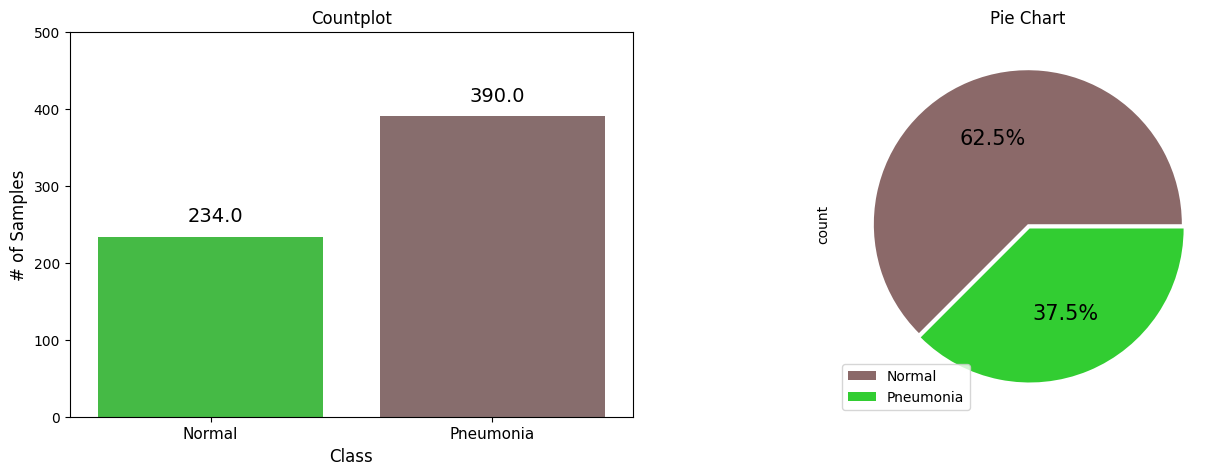

In [19]:
# Creating a subplot for the test data
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Countplot
axs[0].set_title("Countplot")
sns.countplot(x='class', data=df_test, palette=colors_option1, ax=axs[0])
axs[0].set_xlabel("Class", fontsize=12)
axs[0].set_ylabel("# of Samples", fontsize=12)
axs[0].set_ylim(0, 500)
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Normal', 'Pneumonia'], fontsize=11)

for p in axs[0].patches:
    axs[0].annotate((p.get_height()), (p.get_x() + 0.32, p.get_height() + 20), fontsize=14)

# Plot 2: Pie Chart
axs[1].set_title("Pie Chart")
df_test['class'].value_counts().plot(kind='pie', labels=['', ''], autopct='%1.1f%%', colors=colors_option2, explode=[0, 0.03],
                                      textprops={"fontsize": 15}, ax=axs[1])
axs[1].legend(labels=['Normal', 'Pneumonia'])

plt.show()

The distributions from these datasets are a little different from each other. Both are slightly imbalanced, having more samples from the positive class (Pneumonia), with the training set being a little more imbalanced.

<a name='6.2'></a>
### Sample X-Rays.
Let's take a look at a few examples from each dataset.

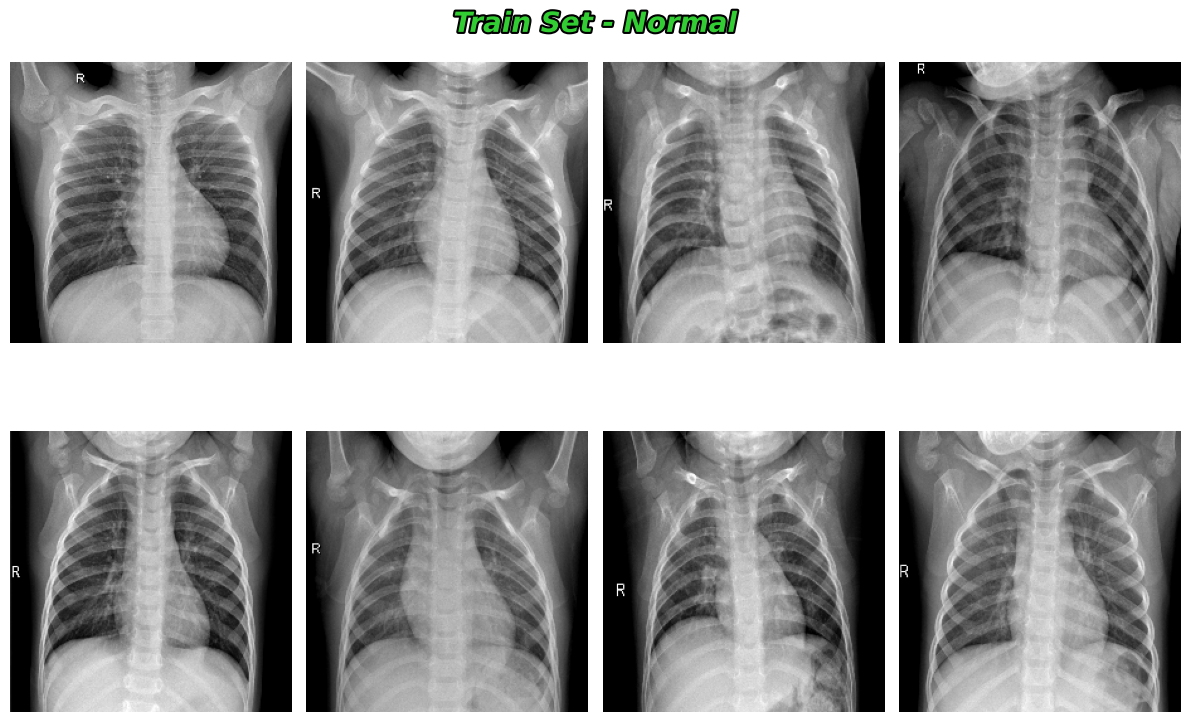

In [20]:
plt.figure(figsize=(12,12))
title_text = plt.suptitle("Train Set - Normal", fontsize=20, y=0.95, fontweight='bold', style='italic', color='limegreen')
title_text.set_path_effects([withStroke(linewidth=3, foreground='black')])

for i in range(0, 8):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

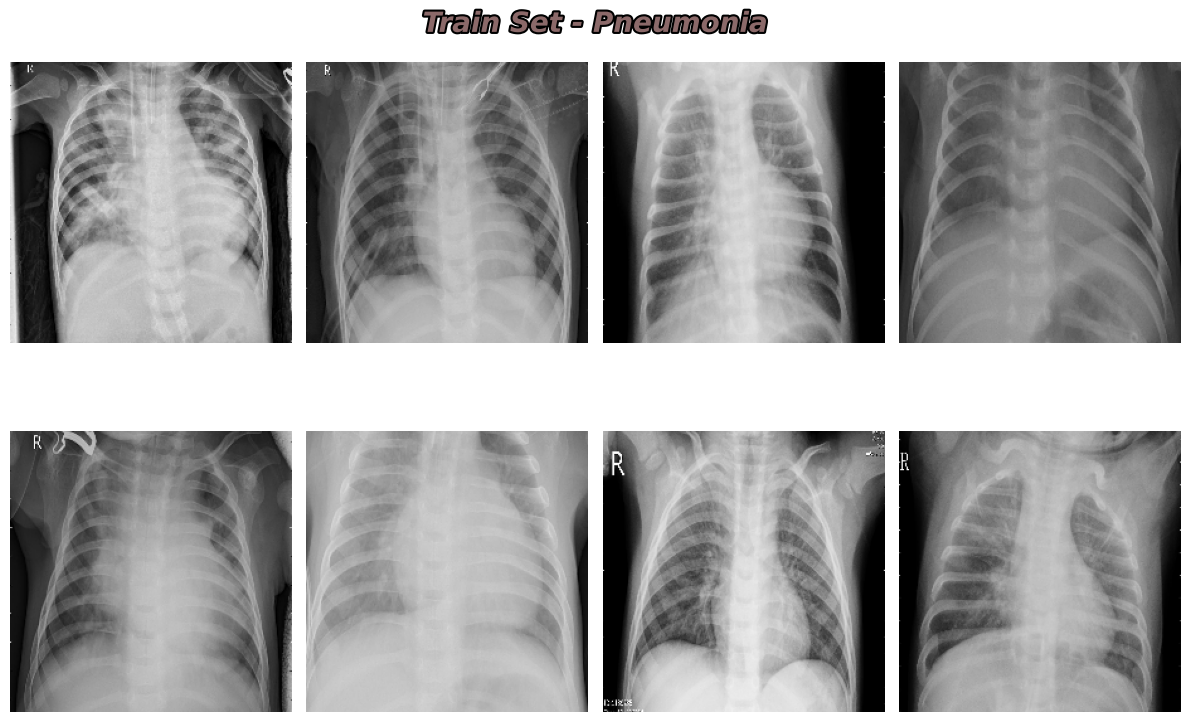

In [21]:
plt.figure(figsize=(12,12))
title_text = plt.suptitle("Train Set - Pneumonia", fontsize=20, y=0.95, fontweight='bold', style='italic', color='#8B6969')
title_text.set_path_effects([withStroke(linewidth=3, foreground='black')])

for i in range(0, 8):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

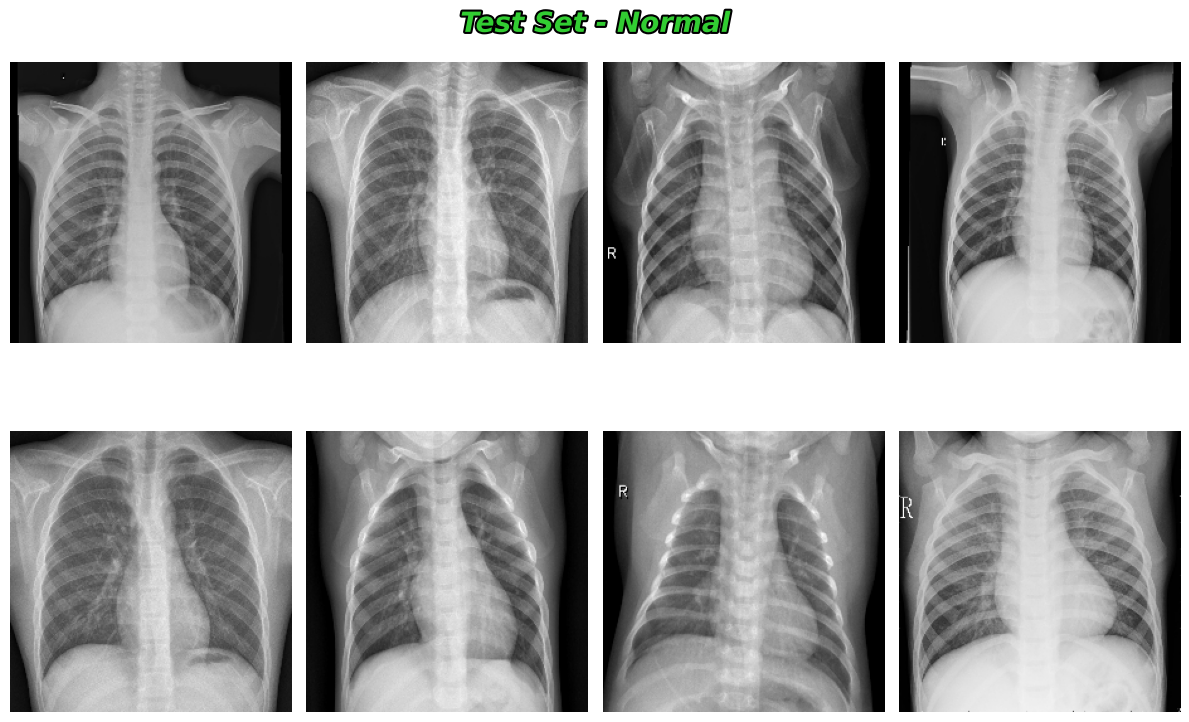

In [22]:
plt.figure(figsize=(12,12))
title_text = plt.suptitle("Test Set - Normal", fontsize=20, y=0.95, fontweight='bold', style='italic', color='limegreen')
title_text.set_path_effects([withStroke(linewidth=3, foreground='black')])
for i in range(0, 8):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

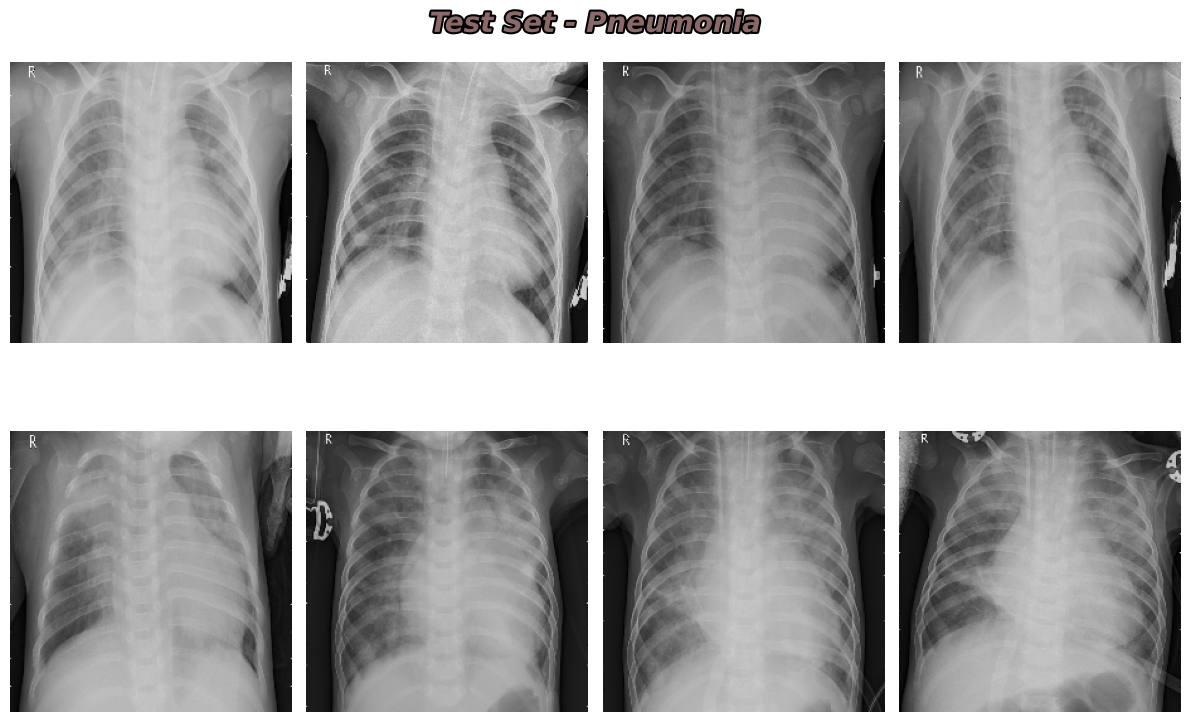

In [23]:
plt.figure(figsize=(12,12))
title_text = plt.suptitle("Test Set - Pneumonia", fontsize=20, y=0.95, fontweight='bold', style='italic', color='#8B6969')
title_text.set_path_effects([withStroke(linewidth=3, foreground='black')])
                          
for i in range(0, 8):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

<a name='7'></a>
## Creating validation split

**Preparing the Data**  
First, I will create a validation set. To do that, I will apply a simple stratified split on the original train dataset, using 80% for actual training and 20% for validation purposes.

In [24]:
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = SEED, stratify = df_train['class'])

In [25]:
val_df

class                                                  image
283      Normal        chest_xray/train/NORMAL\NORMAL-293382-0001.jpeg
1098     Normal       chest_xray/train/NORMAL\NORMAL-8339410-0001.jpeg
2911  Pneumonia  chest_xray/train/PNEUMONIA\BACTERIA-6461260-0001.jpeg
1807  Pneumonia  chest_xray/train/PNEUMONIA\BACTERIA-2696292-0002.jpeg
472      Normal       chest_xray/train/NORMAL\NORMAL-4122298-0001.jpeg
...         ...                                                    ...
4817  Pneumonia     chest_xray/train/PNEUMONIA\VIRUS-7132765-0002.jpeg
4834  Pneumonia     chest_xray/train/PNEUMONIA\VIRUS-7245232-0001.jpeg
3680  Pneumonia  chest_xray/train/PNEUMONIA\BACTERIA-9176919-0006.jpeg
4230  Pneumonia     chest_xray/train/PNEUMONIA\VIRUS-3448615-0001.jpeg
4963  Pneumonia     chest_xray/train/PNEUMONIA\VIRUS-8144515-0001.jpeg

[1047 rows x 2 columns]

In [26]:
train_df

class                                                  image
1102     Normal       chest_xray/train/NORMAL\NORMAL-8349062-0001.jpeg
4163  Pneumonia      chest_xray/train/PNEUMONIA\VIRUS-289775-0001.jpeg
1930  Pneumonia  chest_xray/train/PNEUMONIA\BACTERIA-3170240-0001.jpeg
1724  Pneumonia  chest_xray/train/PNEUMONIA\BACTERIA-2410320-0001.jpeg
149      Normal       chest_xray/train/NORMAL\NORMAL-2180796-0001.jpeg
...         ...                                                    ...
1381  Pneumonia  chest_xray/train/PNEUMONIA\BACTERIA-1083680-0016.jpeg
2401  Pneumonia  chest_xray/train/PNEUMONIA\BACTERIA-4719778-0002.jpeg
3664  Pneumonia  chest_xray/train/PNEUMONIA\BACTERIA-9120067-0004.jpeg
2638  Pneumonia  chest_xray/train/PNEUMONIA\BACTERIA-5476259-0005.jpeg
5216  Pneumonia      chest_xray/train/PNEUMONIA\VIRUS-987036-0002.jpeg

[4185 rows x 2 columns]

<a name='8'></a>
## Preprocessing and Loading Image data

Now, I will load the images from the folders and prepare them to feed our models.

I begin by defining the data generators. With Keras Image Data Generator, we can rescale the pixel values and apply random transformation techniques for data augmentation on the fly. I will define two different generators. The val_datagen is used to simply rescale the validation and test sets. The train_datagen includes some transformations to augment the train set.

I will apply those generators on each dataset using the flow_from_dataframe method. Apart from the transformations defined in each generator, the images are also resized based on the target_size set.

In [27]:
ds_train = train_datagen.flow_from_dataframe(train_df,
                                             #directory=train_path, #dataframe contains the full paths
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'binary',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            #directory=train_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            #directory=test_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)

Found 4185 validated image filenames belonging to 2 classes.
Found 1047 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


<a name='9'></a>
## Creating and training the image classification models.

<a name='9.1'></a>
### I will create an instance of our custom CNN model and see how it performs.

In [28]:
keras.backend.clear_session()

model = get_model()
model.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=3e-5), metrics='binary_accuracy')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 222, 222, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0     

In [29]:
history = model.fit(ds_train,
          batch_size = BATCH, epochs = EPOCH,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/100
130/130 [==============================] - 73s 535ms/step - loss: 0.5173 - binary_accuracy: 0.7697 - val_loss: 0.6419 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 2/100
130/130 [==============================] - 69s 527ms/step - loss: 0.3225 - binary_accuracy: 0.8585 - val_loss: 1.0844 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 3/100
130/130 [==============================] - 68s 522ms/step - loss: 0.2512 - binary_accuracy: 0.8951 - val_loss: 1.1527 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 4/100
131/130 [==============================] - ETA: 0s - loss: 0.2262 - binary_accuracy: 0.9094
Epoch 4: ReduceLROnPlateau reducing learning rate to 5.9999998484272515e-06.
130/130 [==============================] - 69s 526ms/step - loss: 0.2262 - binary_accuracy: 0.9094 - val_loss: 0.7671 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 5/100
130/130 [==============================] - 69s 528ms/step - loss: 0.2115 - binary_accuracy: 0.9085 - val_loss: 

In [30]:
# ds_test is the data generator for the test set

# Make predictions on the test set
predictions = model.predict(ds_test, steps=len(ds_test), verbose=1)

# We know that predictions are probabilities, hence we can convert them to binary predictions (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)

# Display the first few predictions
print("Predictions:\n", binary_predictions[:5])

624/624 [==============================] - 7s 10ms/step
Predictions:
 [[0]
 [0]
 [0]
 [0]
 [0]]


In [31]:
num_features = ds_test.next()[0].shape[1]
print("Number of features:", num_features)

Number of features: 224


  0%|          | 0/1000 [00:00<?, ?it/s]

LIME Explanation as List:
[(1, -0.2558073250309629), (15, 0.13530973540829683), (27, 0.12469125924276556), (2, -0.07079326611670708), (38, 0.056771922248765046), (3, 0.055479262923459026), (36, -0.049463813657717196), (25, 0.04893547117901034), (29, 0.04784792032815736), (20, 0.04778121034970705), (34, 0.03737572651562817), (18, -0.03695844021378665), (10, -0.03553133890994701), (4, 0.03458523002084106), (31, -0.03301854975822), (39, 0.026540490208168108), (24, 0.0260422359927644), (7, 0.021858213599319457), (5, 0.021567091091922064), (11, -0.01881367534372133), (32, -0.017615460134018983), (23, -0.017265424688023275), (16, -0.017073905225993863), (17, 0.016496573798722443), (37, -0.015722705682866024), (21, 0.015342333282427706), (13, -0.013505293171491803), (28, 0.01200537553094135), (6, -0.012002200807922726), (19, 0.011938152361190927), (30, 0.009488807238408035), (33, -0.008900518008055329), (9, 0.007987292886732791), (14, 0.0063536281255557), (8, 0.005747330392551419), (26, 0.005

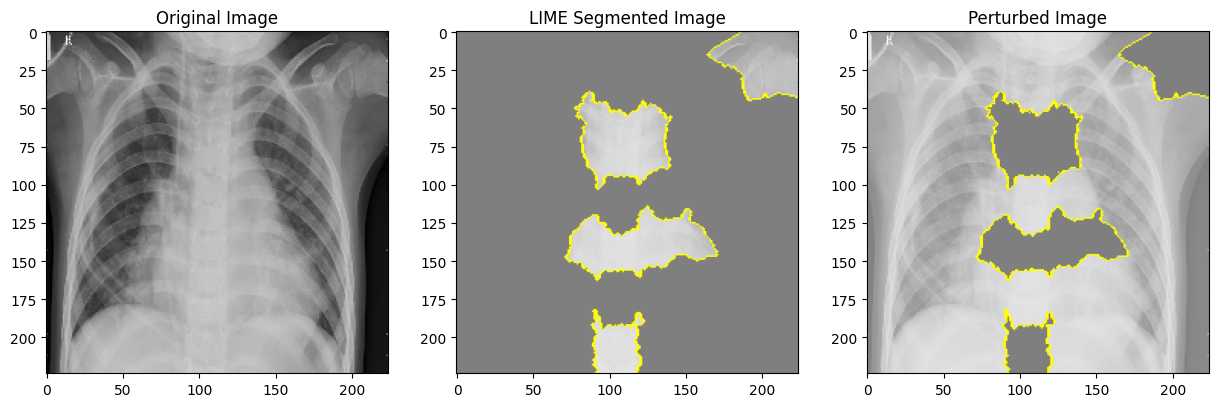

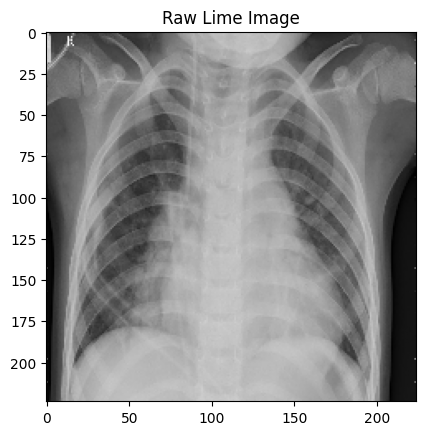

Superpixel Positions:
[[ 4  4  4 ...  3  3  3]
 [ 4  4  4 ...  3  3  3]
 [ 4  4  4 ...  3  3  3]
 ...
 [30 30 30 ... 39 39 39]
 [30 30 30 ... 39 39 39]
 [30 30 30 ... 39 39 39]]


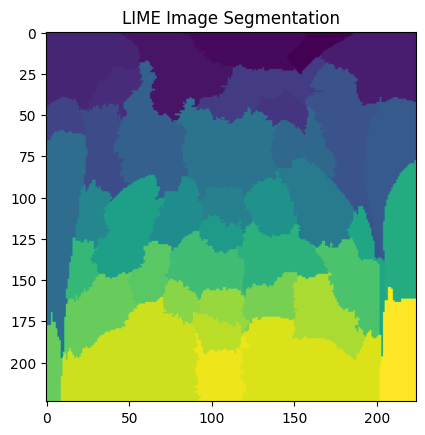

In [32]:
# Using our custom CNN model, test image and displaying segmented images and explainations using lime

lime_segmented_img, lime_explanation = explain_prediction_lime(model, image_path, class_index=0)

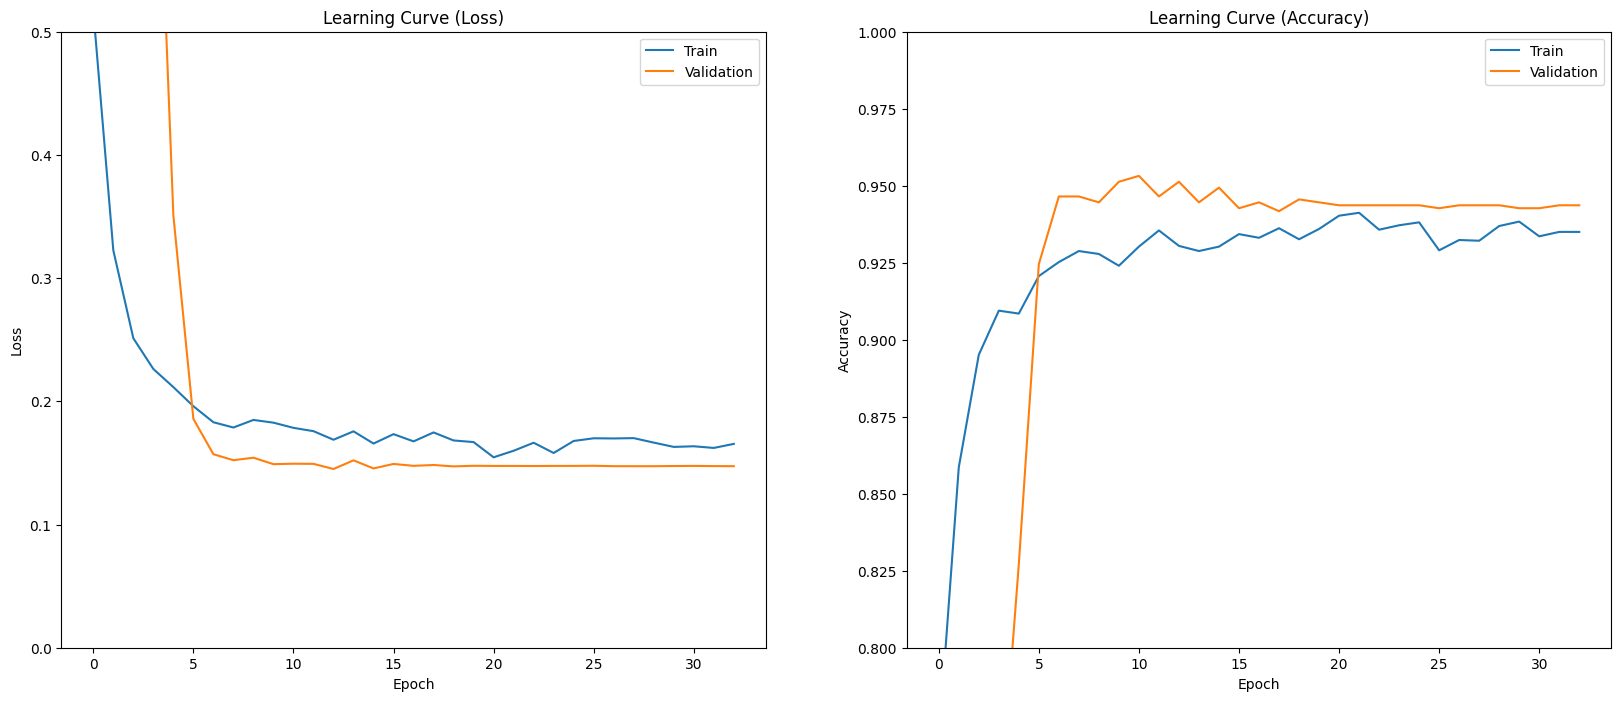

Validation loss: 0.14506667852401733
Validation accuracy: 0.9512894153594971
Test loss: 0.34976083040237427
Test accuracy: 0.8605769276618958


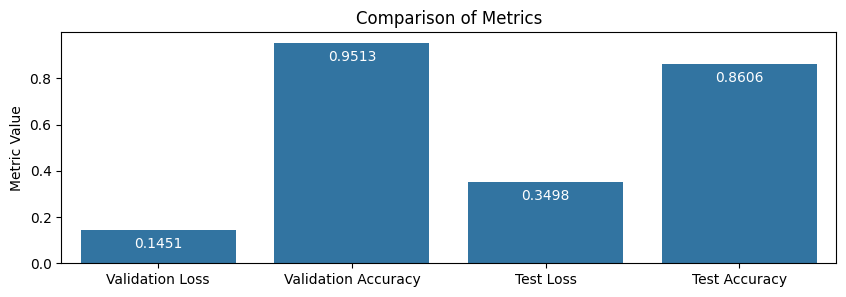

(0.14506667852401733,
 0.9512894153594971,
 0.34976083040237427,
 0.8605769276618958)

In [33]:
# Plot Learning Curves for our Custom CNN model
plot_performance(history)

# Comparing metrics for our Custom CNN model
compare_metrics(model)

<a name='9.2'></a>
### Transfer Learning & Fine-Tuning

**Transfer Learning**  
The second approach, called transfer learning, consists of using a pretrained model as a feature extractor. In this notebook, the selected model was the InceptionV3 available on the Keras Package.

This model was already trained in another dataset (ImageNet). What we do here is to set include_top to false, removing the ‘head’, responsible for assigning the classes in this other dataset, and keep all the previous layers. Then, include our last few layers, including the one responsible for generating the output.

**Fine-Tuning**
My last approach is called Fine Tuning. In the last section, all the layers from the pretrained model were ‘frozen’, preserving the weights calculated during its training on the ImageNet dataset. Now, I will unfreeze a few of its last layers and continue the training, tuning the weights from these layers according to our dataset.

<a name='9.2.1'></a>
#### ResNet152V2

<a name='9.2.1.1'></a>
##### **Base ResNet152V2**

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

  0%|          | 0/1000 [00:00<?, ?it/s]

LIME Explanation as List:
[(25, 0.021911261663376883), (14, 0.020525225246956224), (30, 0.020210934596500748), (26, 0.018476446493915052), (34, 0.01582652638996742), (16, 0.014992768375190462), (28, 0.014760537685268907), (10, 0.013779401602847291), (27, 0.01149633458582086), (9, 0.011187489892037873), (22, 0.010770605346930709), (32, 0.010208059679704309), (3, 0.008266837918999143), (7, -0.00814395971248416), (13, 0.007502288637322089), (37, 0.007167250256859168), (20, -0.006828343176991848), (4, 0.005907790258498329), (35, 0.005745468045515977), (19, 0.00569986129547811), (12, 0.005666565792196144), (36, 0.005473374840176141), (18, 0.005362739712539165), (33, 0.004702358879446371), (29, 0.004306310146156419), (1, -0.003948508465701771), (24, 0.003744584919423963), (39, 0.0037124341570541415), (17, 0.0030023384577202174), (2, 0.002937822901675909), (5, 0.0029110490614692465), (21, -0.0027436183334427306), (15, -0.0018793971536456998), (38, 0.0011053288527719017), (0, 0.000963423836369

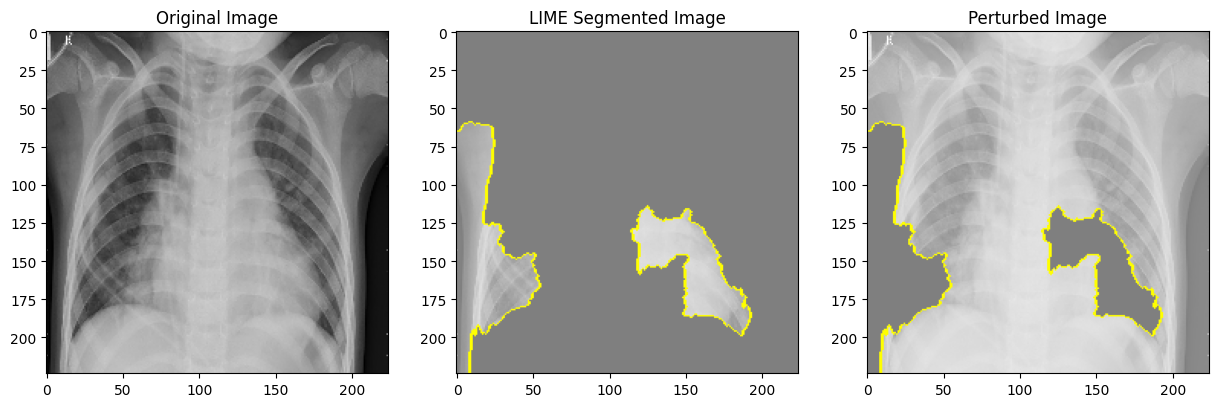

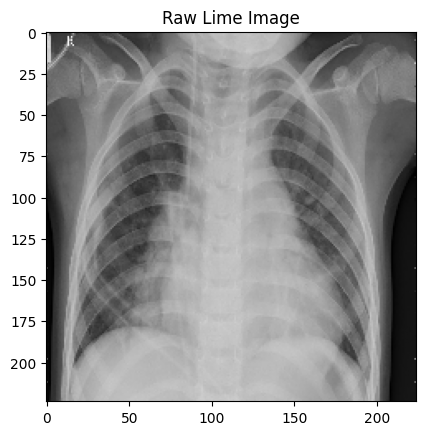

Superpixel Positions:
[[ 4  4  4 ...  3  3  3]
 [ 4  4  4 ...  3  3  3]
 [ 4  4  4 ...  3  3  3]
 ...
 [30 30 30 ... 39 39 39]
 [30 30 30 ... 39 39 39]
 [30 30 30 ... 39 39 39]]


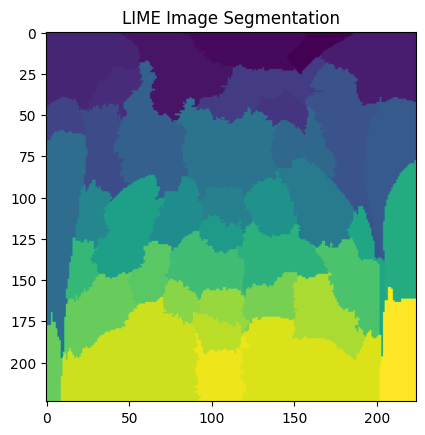

In [34]:
# Downloading and initialising ResNet model
base_model_ResNet = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

# Freezing layers
base_model_ResNet.trainable = False

# Clearing and releasing resources
keras.backend.clear_session()

# Compiling our model
model_pretrained_ResNet = get_pretrained_ResNet()
model_pretrained_ResNet.compile(loss='binary_crossentropy', 
                                optimizer = keras.optimizers.Adam(learning_rate=5e-5), metrics='binary_accuracy')

# Checking model summary
model_pretrained_ResNet.summary()

# Training/feeding the model
history = model_pretrained_ResNet.fit(ds_train,
          batch_size = BATCH, epochs = EPOCH,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

# Using our model with lime for explainations
lime_segmented_img, lime_explanation = explain_prediction_lime(model_pretrained_ResNet, image_path, class_index=0)

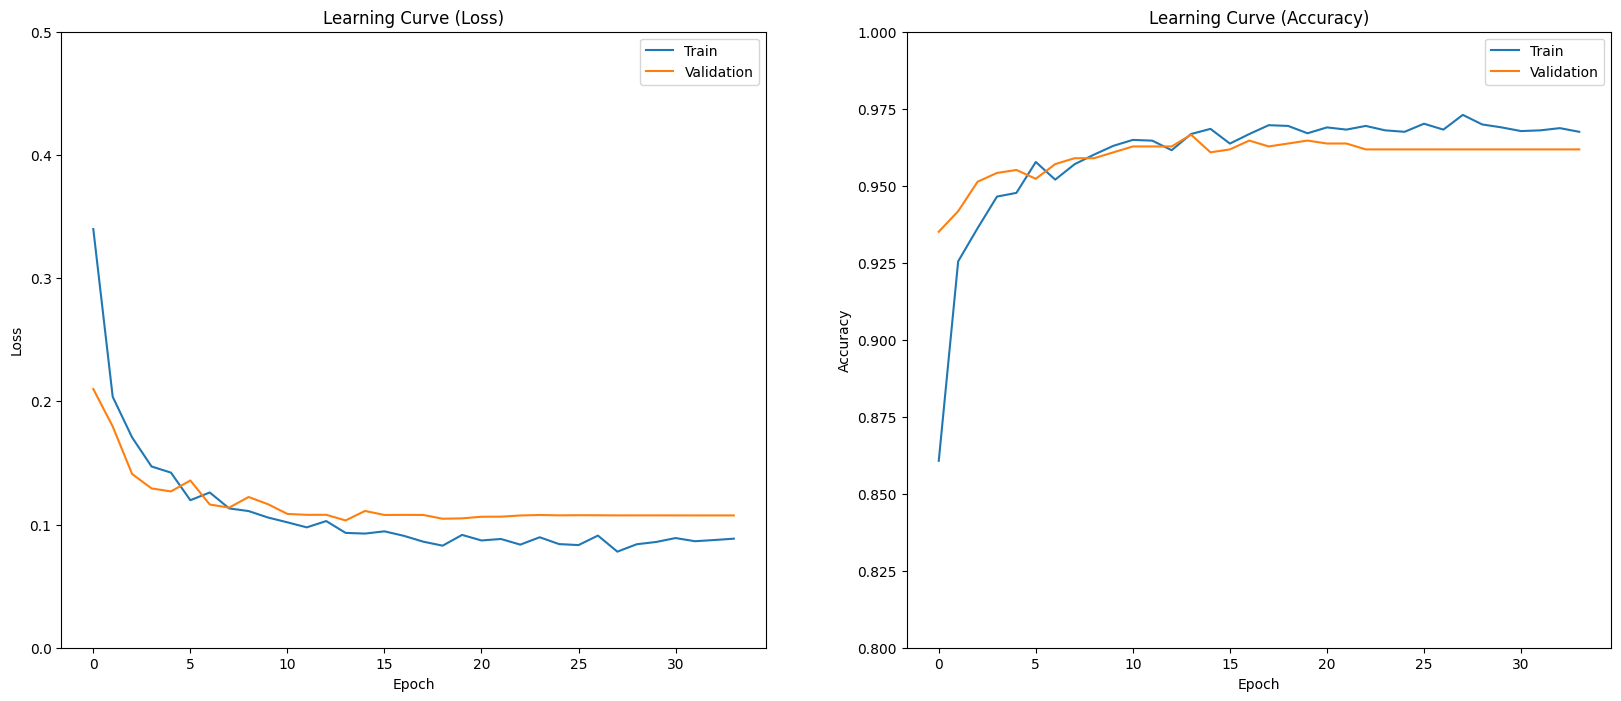

Validation loss: 0.10331697762012482
Validation accuracy: 0.9665711522102356
Test loss: 0.286258727312088
Test accuracy: 0.8814102411270142


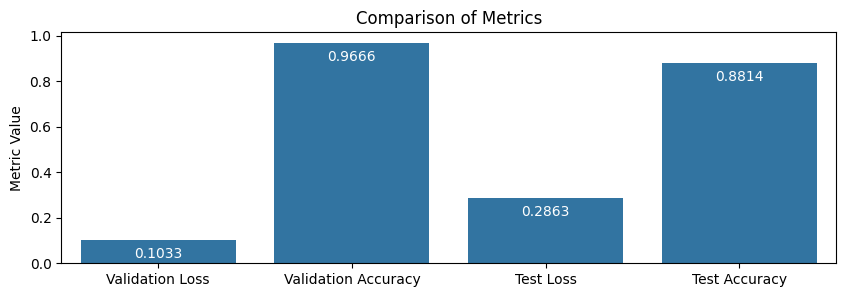

(0.10331697762012482,
 0.9665711522102356,
 0.286258727312088,
 0.8814102411270142)

In [35]:
# Plotting Learning Curves for our base ResNet model
plot_performance(history)

# Comparing metrics for our base ResNet model
compare_metrics(model_pretrained_ResNet)

<a name='9.2.1.2'></a>
##### **Fine Tuning ResNet152V2**

In [36]:
# Un-Freezing all layers
base_model_ResNet.trainable = True

# Freezing all layers except for the last 250
# There are 564 layers in ResNet152V2
for layer in base_model_ResNet.layers[:-250]:
    layer.trainable = False

# Clearing and releasing resources
keras.backend.clear_session()

model_pretrained_ResNet = get_pretrained_ResNet()

# Checking which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model_ResNet.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_bloc

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

  0%|          | 0/1000 [00:00<?, ?it/s]

LIME Explanation as List:
[(15, -0.000373129356473685), (12, -0.0003569522585853206), (36, 0.0002947523568573362), (38, 0.0002306089961301507), (13, -0.00021125271373741508), (30, 0.00020588096206454657), (17, -0.00019683702807100415), (9, -0.00019496828531148682), (24, -0.00016251481147596116), (14, 0.00015107834209391964), (25, -0.00014985939334672443), (4, 0.00013689406914850656), (10, 0.00012617603579296945), (7, 0.00011990090993472425), (31, -0.0001178575887424597), (16, -0.00011006381540183714), (11, -9.718649577805115e-05), (29, 9.443568485640504e-05), (28, -9.399759097857782e-05), (22, 9.304021175603703e-05), (21, -9.29475524990125e-05), (35, -9.108607931138071e-05), (8, 7.17589124757299e-05), (2, 6.789001136877571e-05), (6, -5.6957090617369033e-05), (37, -5.358067541605249e-05), (33, 5.301881149456217e-05), (39, -4.627919985827675e-05), (20, -4.180288388904394e-05), (0, -4.150610424457049e-05), (27, -3.12716143693731e-05), (26, 2.475028674588474e-05), (5, 2.4493626737100952e-0

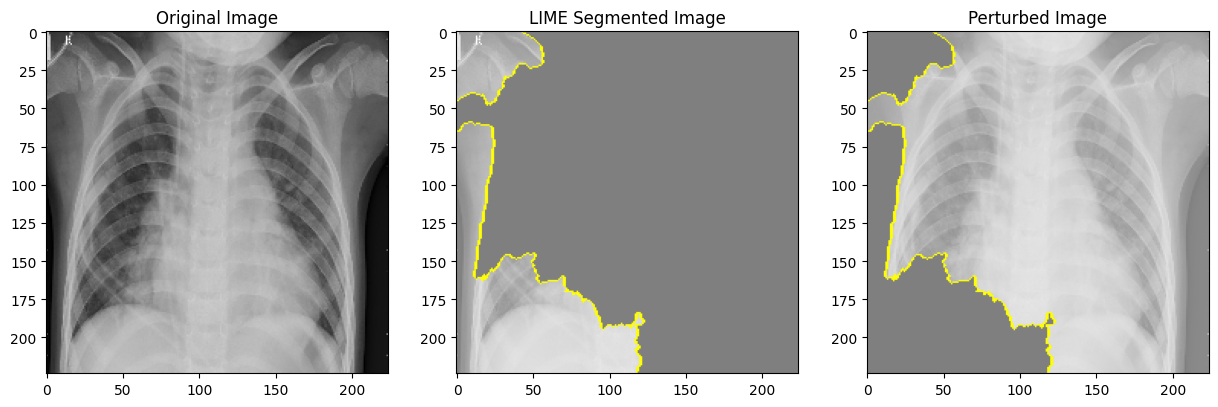

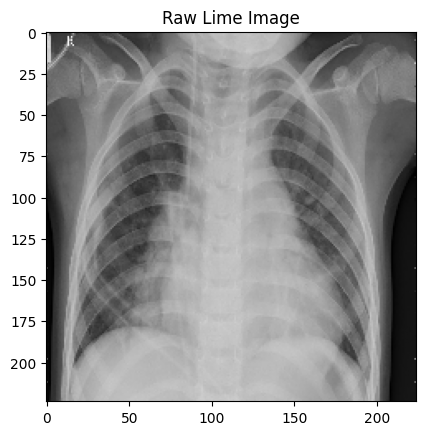

Superpixel Positions:
[[ 4  4  4 ...  3  3  3]
 [ 4  4  4 ...  3  3  3]
 [ 4  4  4 ...  3  3  3]
 ...
 [30 30 30 ... 39 39 39]
 [30 30 30 ... 39 39 39]
 [30 30 30 ... 39 39 39]]


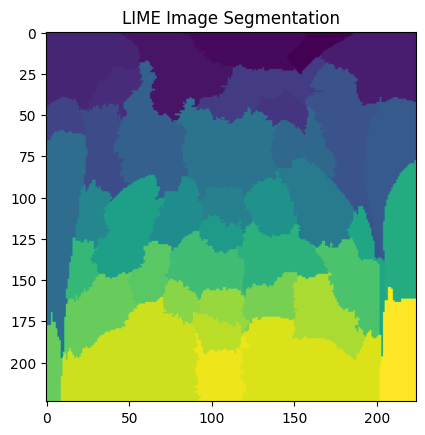

In [37]:
# I confirm that the last 250 layers are trainable. We will compile the model now.

# Compiling our model
model_pretrained_ResNet.compile(loss='binary_crossentropy', 
                                optimizer = keras.optimizers.Adam(learning_rate=0.001), metrics='binary_accuracy')

# Checking model summary
model_pretrained_ResNet.summary()

# Training/feeding the model
history_finetuned_resnet = model_pretrained_ResNet.fit(ds_train,
          batch_size = BATCH, epochs = EPOCH,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

# Using our model with lime for explainations
lime_segmented_img, lime_explanation = explain_prediction_lime(model_pretrained_ResNet, image_path, class_index=0)

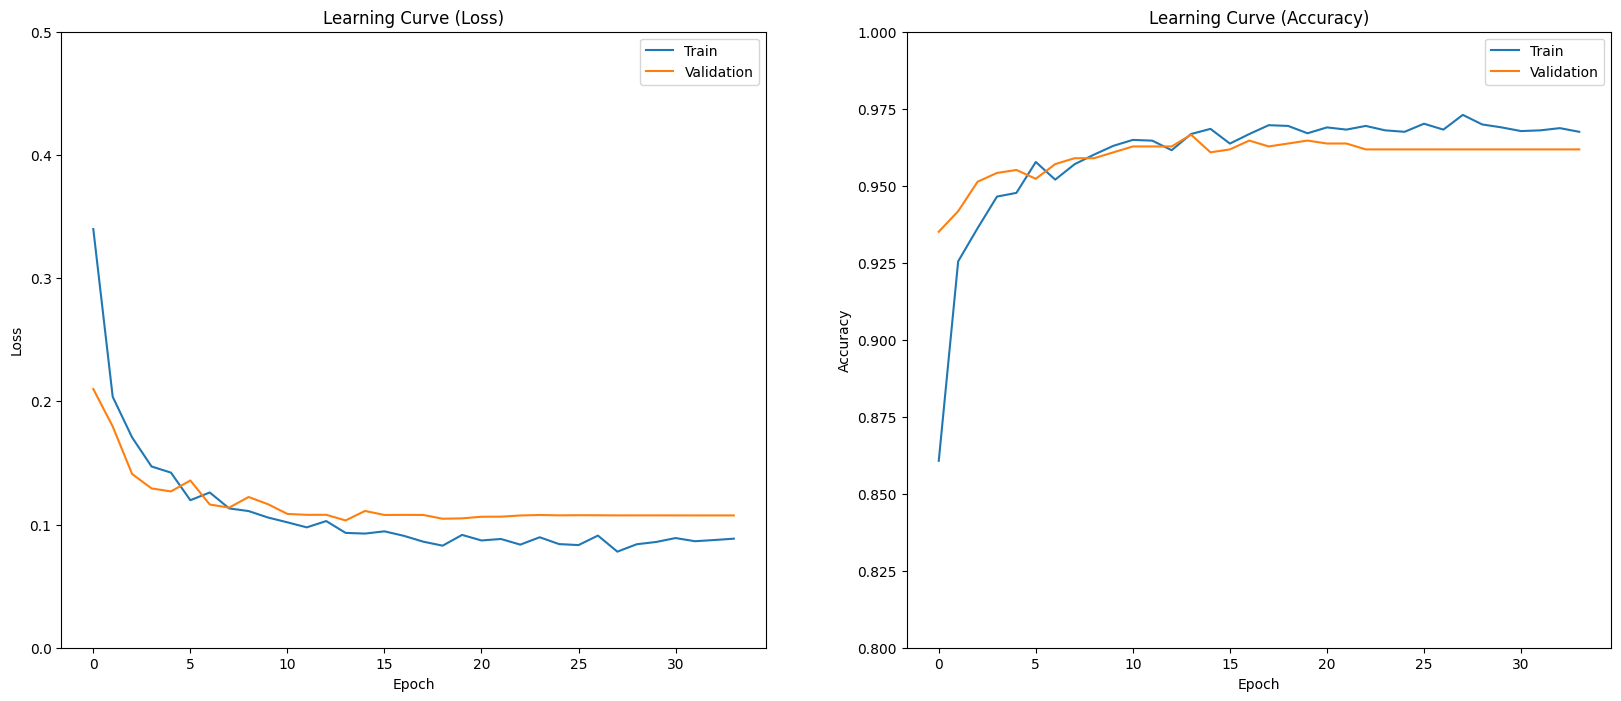

Validation loss: 0.09321007877588272
Validation accuracy: 0.9732569456100464
Test loss: 0.12679733335971832
Test accuracy: 0.9647436141967773


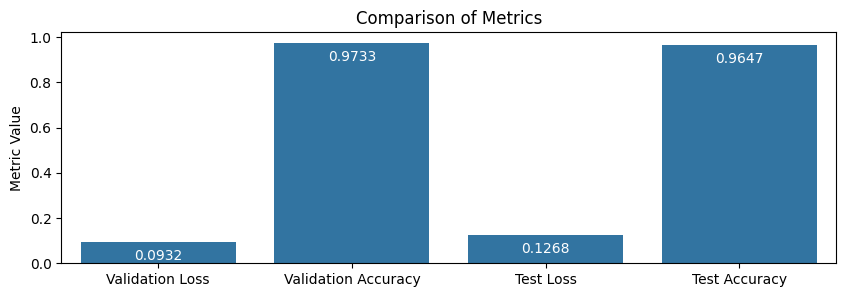

(0.09321007877588272,
 0.9732569456100464,
 0.12679733335971832,
 0.9647436141967773)

In [38]:
# Plotting Learning Curves for our Fine-tuned ResNet model
plot_performance(history)

# Comparing metrics for our Fine-tuned ResNet model
compare_metrics(model_pretrained_ResNet)

As expected, the fine-tuning approach has reached the best score. We will check the performance Metrics now.

In [39]:
# Configuring/encoding our test labels
num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

# Predicting using the model
ds_test.reset()
predictions = model_pretrained_ResNet.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

# Printing accuracy score
print("Test Accuracy: ", accuracy_score(Y_test, pred_labels))

Test Accuracy:  0.9647435897435898


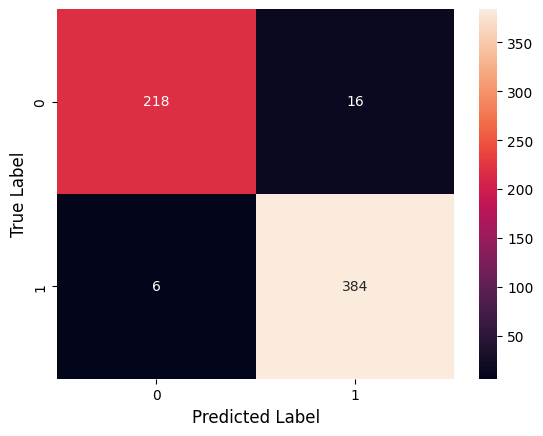

In [40]:
# Plotting a heatmap for our conusion matrix
confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [41]:
# Printing the classification report
print(metrics.classification_report(Y_test, pred_labels, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       234
           1       0.96      0.98      0.97       390

    accuracy                           0.96       624
   macro avg       0.97      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624



ROC_AUC:  0.9955785667324129


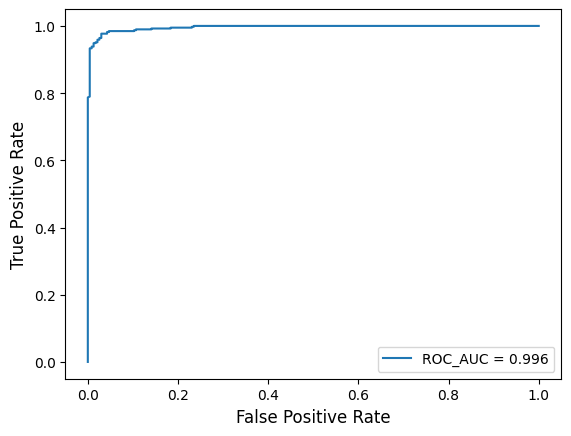

In [42]:
# Plotting the ROC-AUC curve and score

roc_auc = metrics.roc_auc_score(Y_test, predictions)
print('ROC_AUC: ', roc_auc)

fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)

plt.plot(fpr, tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

**The recall was close to 100%.**    
Even without expertise on the medical field, it’s reasonable to assume that false negatives are more ‘costly’ than false positives in this case. Reaching such recall with a relatively small dataset for training as this one, while also reaching a pretty good recall, is a good indicative of the model’s capabilities. Such capabilities are also confirmed by the high ROC-AUC value.

<a name='9.2.2'></a>
#### DenseNet201

<a name='9.2.2.1'></a>
##### **Base DenseNet201**

In [43]:
base_model_densenet = tf.keras.applications.DenseNet201(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model_densenet.trainable = False

# Clearing and releasing resources
keras.backend.clear_session()

model_pretrained_densenet = get_pretrained_densenet()
model_pretrained_densenet.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics='binary_accuracy')

model_pretrained_densenet.summary()

history_densenet = model_pretrained_densenet.fit(
    ds_train,
    batch_size=BATCH,
    epochs=EPOCH,
    validation_data=ds_val,
    callbacks=[early_stopping, plateau],
    steps_per_epoch=(len(train_df) / BATCH),
    validation_steps=(len(val_df) / BATCH)
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               245888    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

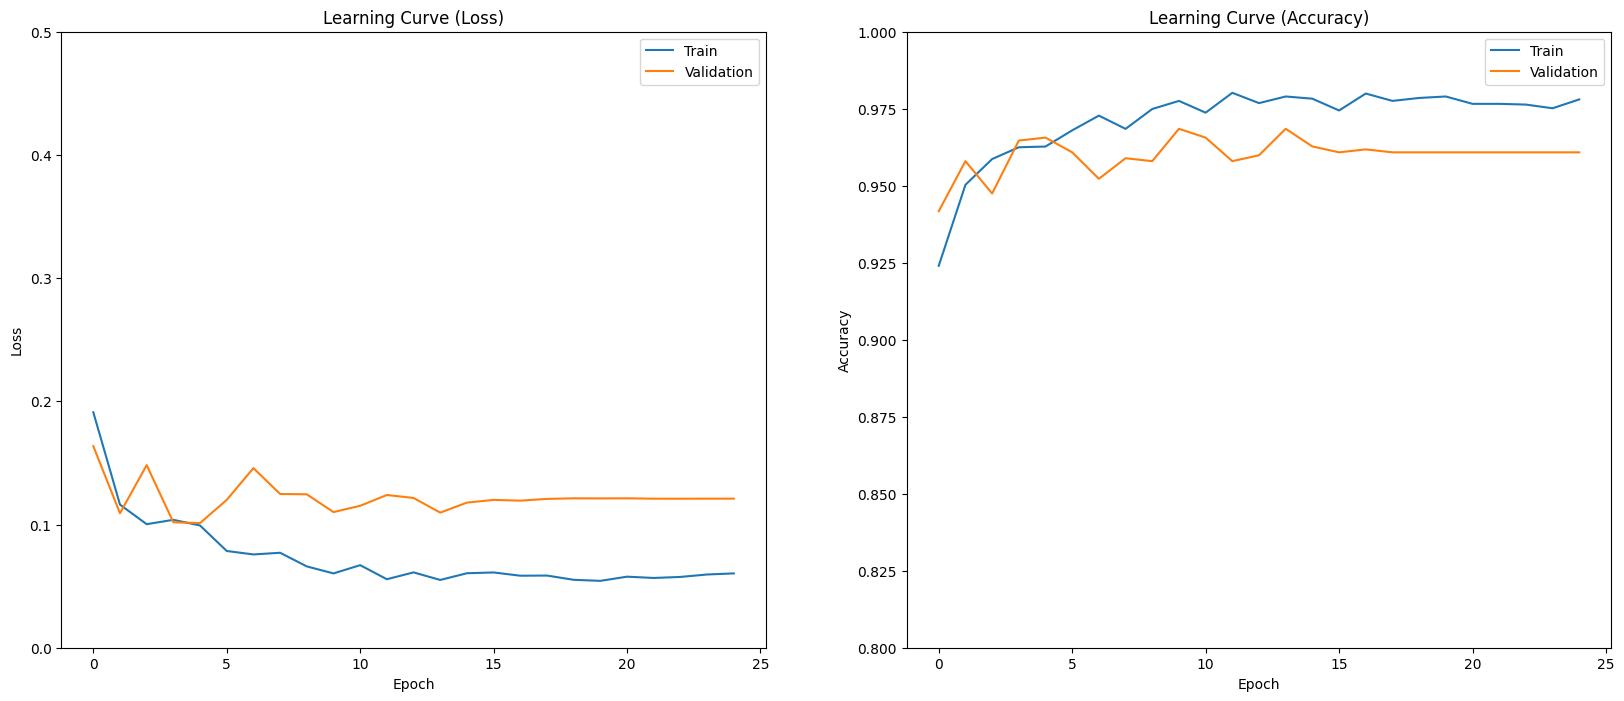

Validation loss: 0.10117524117231369
Validation accuracy: 0.9656160473823547
Test loss: 0.3589107096195221
Test accuracy: 0.8782051205635071


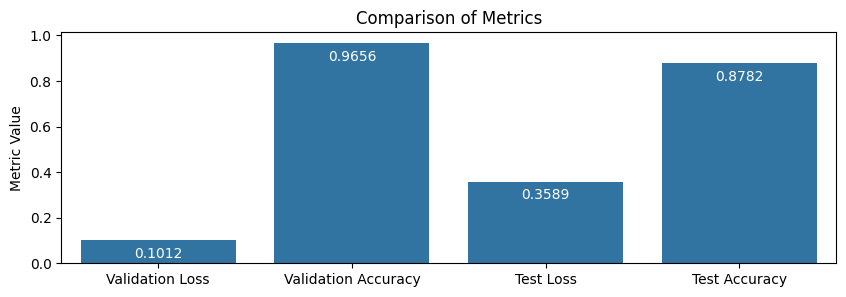

(0.10117524117231369,
 0.9656160473823547,
 0.3589107096195221,
 0.8782051205635071)

In [44]:
# Plotting Learning Curves for our base DenseNet model
plot_performance(history_densenet)

# Comparing metrics for our base DenseNet model
compare_metrics(model_pretrained_densenet)

<a name='9.2.2.2'></a>
##### **Fine-Tuned DenseNet201**

In [45]:
# Set base model to trainable
base_model_densenet.trainable = True

# Freeze all layers except for the last 400 layers
# There are 707 layers in DenseNet201
for layer in base_model_densenet.layers[:-400]:
    layer.trainable = False

# Clear any previous Keras sessions
keras.backend.clear_session()

model_pretrained_densenet = get_pretrained_densenet()

# Compile the model with a lower learning rate
model_pretrained_densenet.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics='binary_accuracy')

# Display the summary of the model
model_pretrained_densenet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               245888    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [46]:
# Fine-tune the model
history_finetuned_densenet = model_pretrained_densenet.fit(
    ds_train,
    batch_size=BATCH,
    epochs=EPOCH,
    validation_data=ds_val,
    callbacks=[early_stopping, plateau],
    steps_per_epoch=(len(train_df) / BATCH),
    validation_steps=(len(val_df) / BATCH)
)

Epoch 1/100
130/130 [==============================] - 110s 746ms/step - loss: 0.1268 - binary_accuracy: 0.9515 - val_loss: 0.9887 - val_binary_accuracy: 0.8586 - lr: 0.0010
Epoch 2/100
130/130 [==============================] - 93s 712ms/step - loss: 0.0777 - binary_accuracy: 0.9723 - val_loss: 0.7255 - val_binary_accuracy: 0.8997 - lr: 0.0010
Epoch 3/100
130/130 [==============================] - 93s 712ms/step - loss: 0.0500 - binary_accuracy: 0.9811 - val_loss: 0.3141 - val_binary_accuracy: 0.9179 - lr: 0.0010
Epoch 4/100
130/130 [==============================] - 93s 712ms/step - loss: 0.0460 - binary_accuracy: 0.9821 - val_loss: 0.1568 - val_binary_accuracy: 0.9589 - lr: 0.0010
Epoch 5/100
130/130 [==============================] - 93s 712ms/step - loss: 0.0383 - binary_accuracy: 0.9873 - val_loss: 0.4145 - val_binary_accuracy: 0.8940 - lr: 0.0010
Epoch 6/100
130/130 [==============================] - 93s 712ms/step - loss: 0.0367 - binary_accuracy: 0.9878 - val_loss: 0.2287 - va

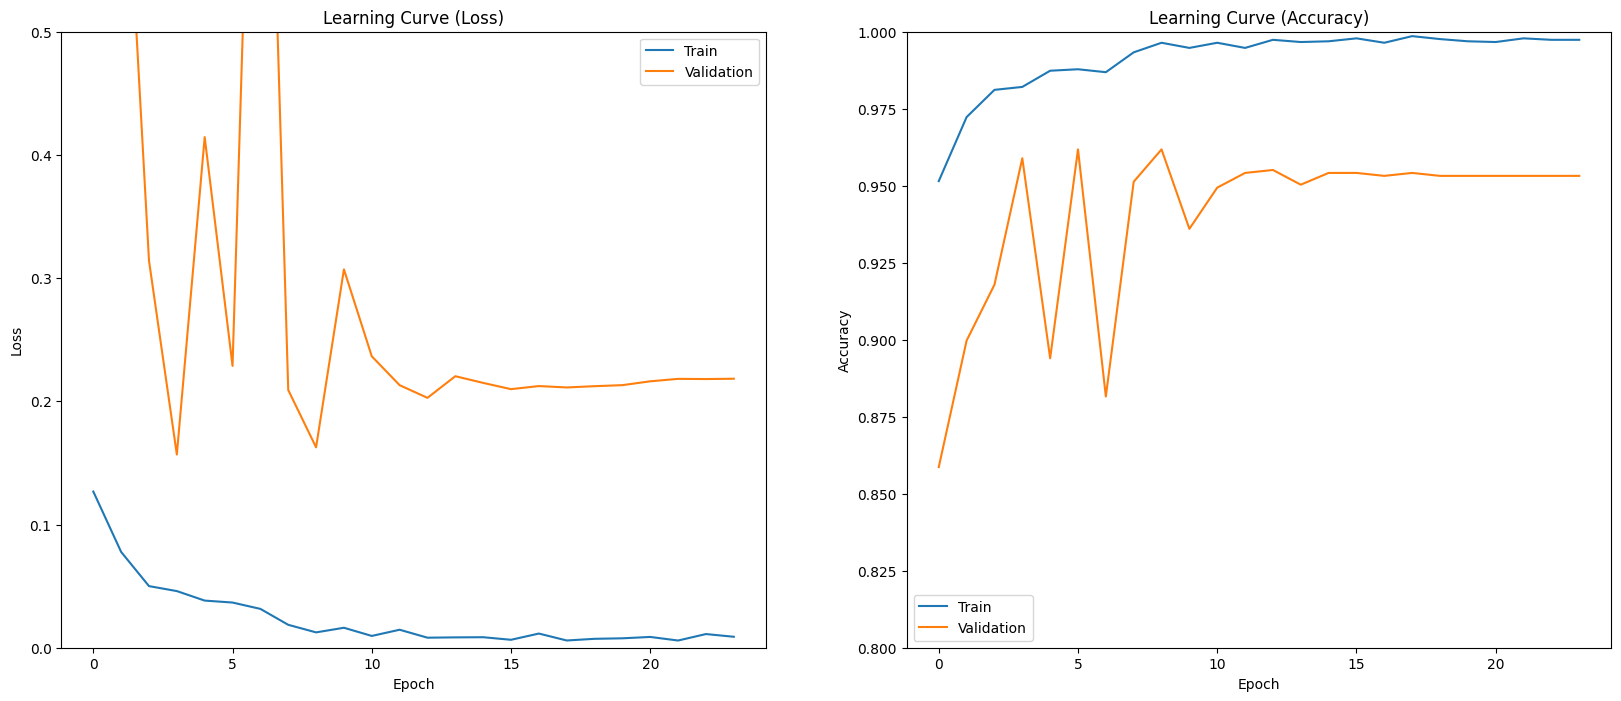

Validation loss: 0.15679967403411865
Validation accuracy: 0.958930253982544
Test loss: 0.10859222710132599
Test accuracy: 0.9759615659713745


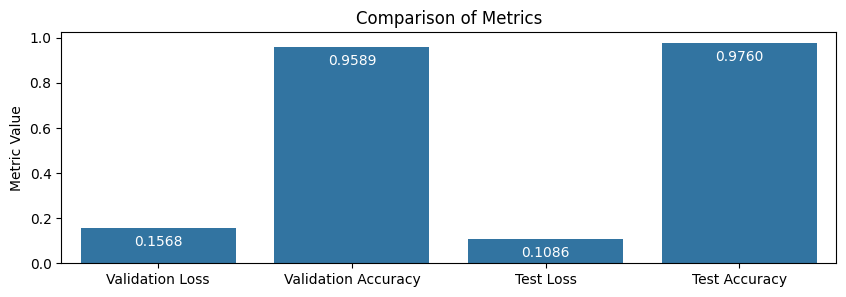

(0.15679967403411865,
 0.958930253982544,
 0.10859222710132599,
 0.9759615659713745)

In [47]:
# Plotting Learning Curves for our Fine-Tuned DenseNet model
plot_performance(history_finetuned_densenet)

# Comparing metrics for our Fine-Tuned DenseNet model
compare_metrics(model_pretrained_densenet)

<a name='9.2.3'></a>
#### InceptionV3

<a name='9.2.3.1'></a>
##### **Base InceptionV3**

In [48]:
base_model_inception = tf.keras.applications.InceptionV3(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model_inception.trainable = False

# Clear any previous Keras sessions
keras.backend.clear_session()

model_pretrained_inception = get_pretrained_inception()

model_pretrained_inception.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics='binary_accuracy')

model_pretrained_inception.summary()

history_inception = model_pretrained_inception.fit(
    ds_train,
    batch_size=BATCH,
    epochs=EPOCH,
    validation_data=ds_val,
    callbacks=[early_stopping, plateau],
    steps_per_epoch=(len(train_df) / BATCH),
    validation_steps=(len(val_df) / BATCH)
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

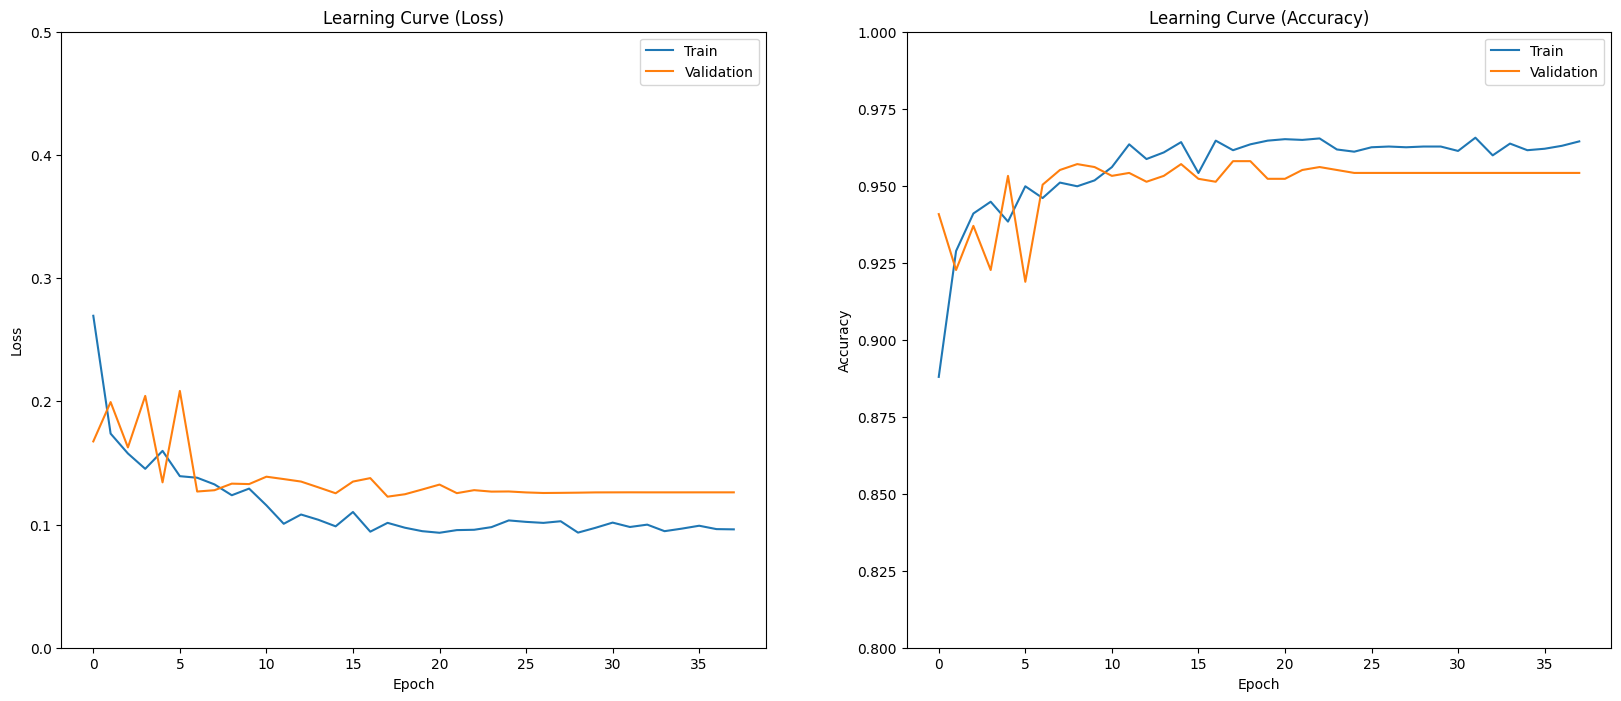

Validation loss: 0.1226150393486023
Validation accuracy: 0.9579751491546631
Test loss: 0.2750636637210846
Test accuracy: 0.8846153616905212


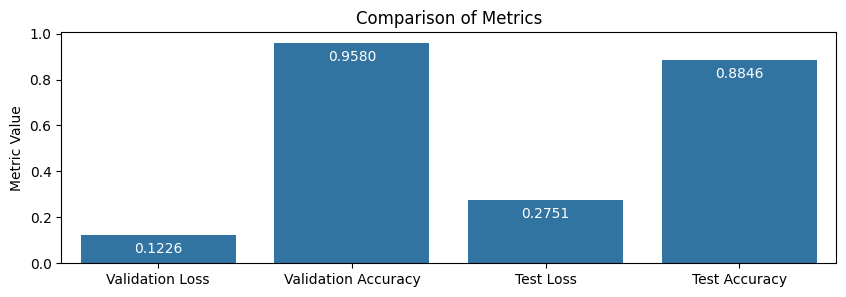

(0.1226150393486023,
 0.9579751491546631,
 0.2750636637210846,
 0.8846153616905212)

In [49]:
# Plotting Learning Curves for our base InceptionV3 model
plot_performance(history_inception)

# Comparing metrics for our base InceptionV3 model
compare_metrics(model_pretrained_inception)

<a name='9.2.3.2'></a>
##### **Fine-Tuned InceptionV3**

In [50]:
# Set base model to trainable
base_model_inception.trainable = True

# Freeze all layers except for the last 151 layers
# There are 311 layers in InceptionV3
for layer in base_model_inception.layers[:-151]:  # Adjust the number of layers to unfreeze
    layer.trainable = False

# Clear any previous Keras sessions
keras.backend.clear_session()

model_pretrained_inception = get_pretrained_inception()

# Compile the model with a lower learning rate
model_pretrained_inception.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics='binary_accuracy')

# Display the summary of the model
model_pretrained_inception.summary()

# Fine-tune the model
history_finetuned_inception = model_pretrained_inception.fit(
    ds_train,
    batch_size=BATCH,
    epochs=EPOCH,
    validation_data=ds_val,
    callbacks=[early_stopping, plateau],
    steps_per_epoch=(len(train_df) / BATCH),
    validation_steps=(len(val_df) / BATCH)
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

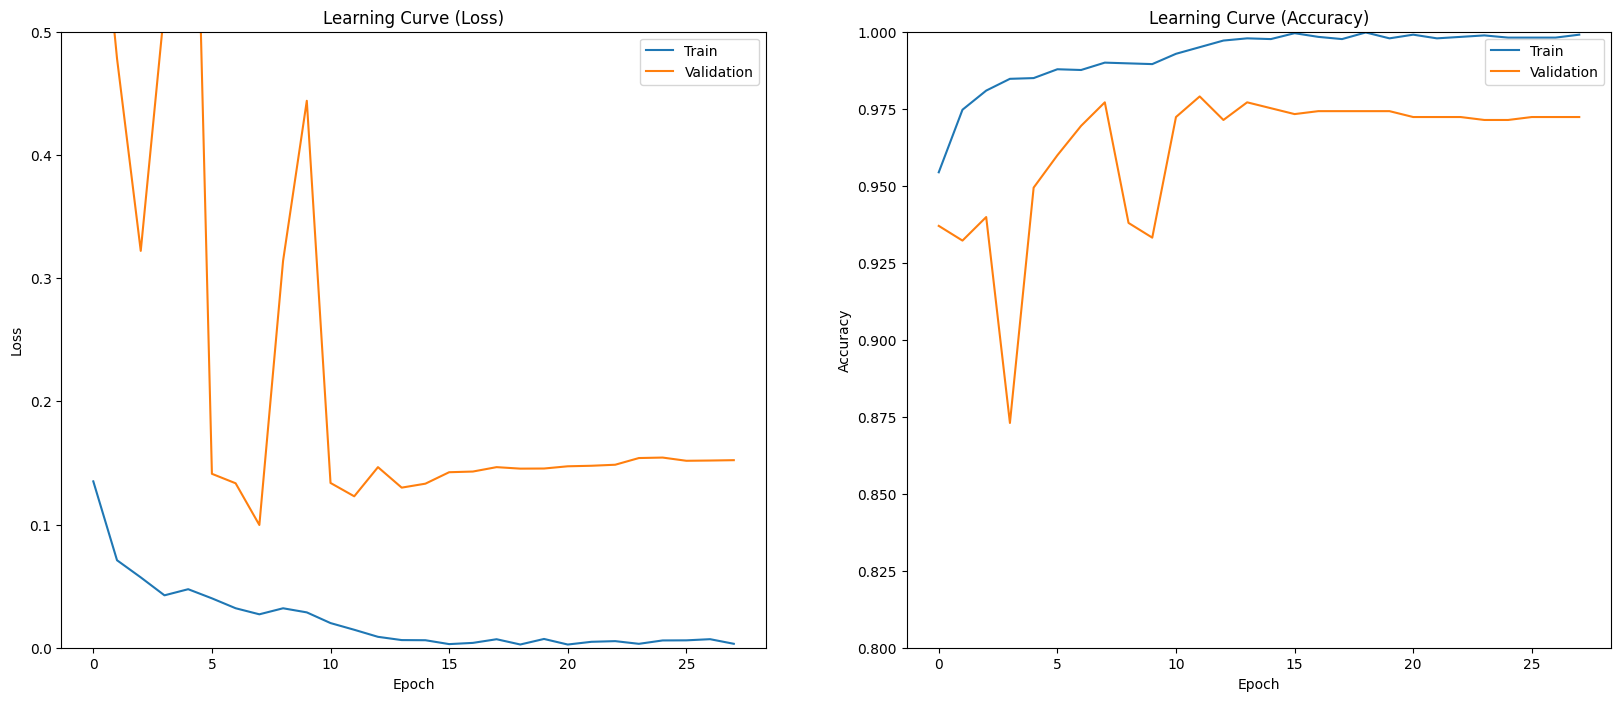

Validation loss: 0.09961916506290436
Validation accuracy: 0.9770773649215698
Test loss: 0.21211539208889008
Test accuracy: 0.9519230723381042


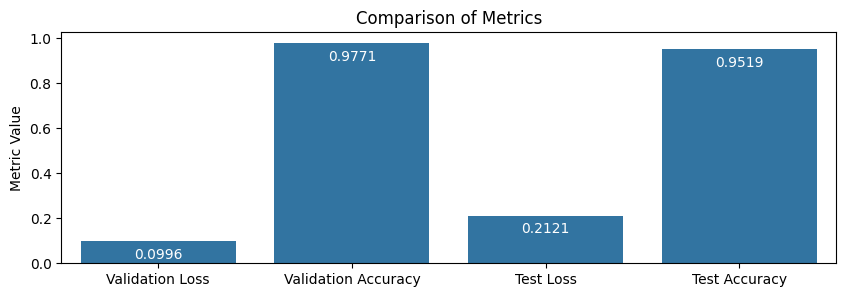

(0.09961916506290436,
 0.9770773649215698,
 0.21211539208889008,
 0.9519230723381042)

In [51]:
# Plotting Learning Curves for Fine-Tuned InceptionV3 model
plot_performance(history_finetuned_inception)

# Comparing metrics for our Fine-Tuned InceptionV3 model
compare_metrics(model_pretrained_inception)

<a name='9.2.4'></a>
#### MobileNetV2

<a name='9.2.4.1'></a>
##### **Base MobileNetV2**

In [52]:
# Load MobileNetV2 with pre-trained weights
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False)
base_model_mobilenetv2.trainable = False

# Clear any previous Keras sessions
keras.backend.clear_session()

# Create MobileNetV2 model
model_pretrained_mobilenetv2 = get_pretrained_mobilenetv2()

# Compile the model
model_pretrained_mobilenetv2.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=5e-5),
    metrics='binary_accuracy'
)

# Display model summary
model_pretrained_mobilenetv2.summary()

# Train the model
history_mobilenetv2 = model_pretrained_mobilenetv2.fit(
    ds_train,
    batch_size=BATCH,
    epochs=EPOCH,
    validation_data=ds_val,
    callbacks=[early_stopping, plateau],
    steps_per_epoch=(len(train_df) / BATCH),
    validation_steps=(len(val_df) / BATCH)
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129   

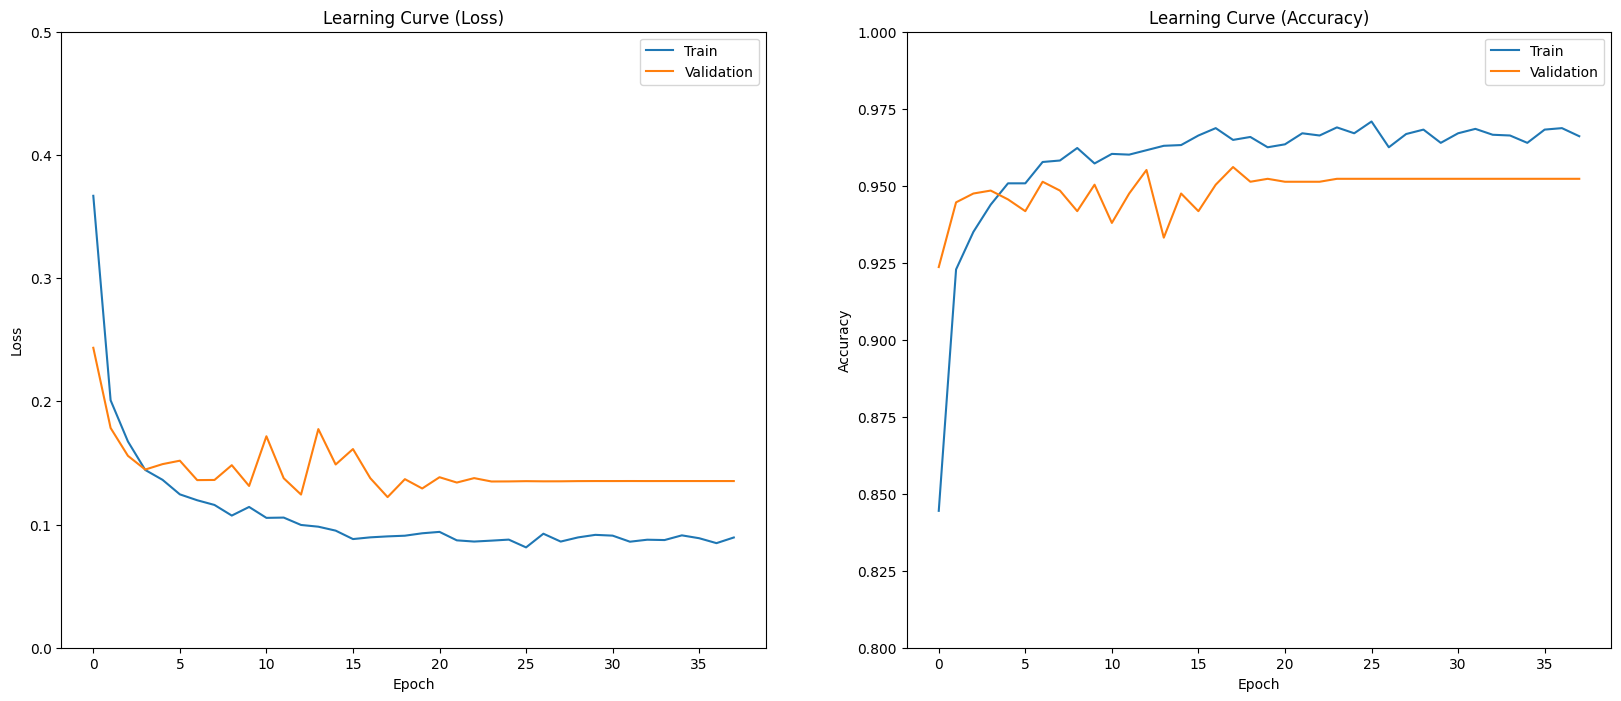

Validation loss: 0.12225660681724548
Validation accuracy: 0.9560649394989014
Test loss: 0.17252227663993835
Test accuracy: 0.9262820482254028


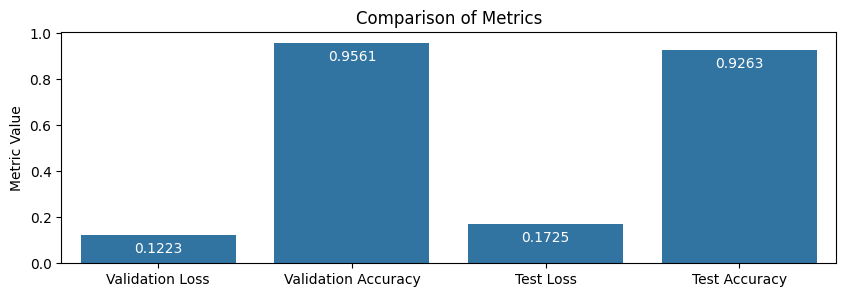

(0.12225660681724548,
 0.9560649394989014,
 0.17252227663993835,
 0.9262820482254028)

In [53]:
# Plotting Learning Curves for our base MobileNetV2 model
plot_performance(history_mobilenetv2)

# Comparing metrics for our bae MobileNetV2 model
compare_metrics(model_pretrained_mobilenetv2)

<a name='9.2.4.2'></a>
##### **Fine-Tuned MobileNetV2**

In [54]:
# Set base model to trainable
base_model_mobilenetv2.trainable = True

# Freeze all layers except for the last 110 layers
# There are 154 layers in MobileNetV2
for layer in base_model_mobilenetv2.layers[:-110]:  # Adjust the number of layers to unfreeze
    layer.trainable = False

# Clear any previous Keras sessions
keras.backend.clear_session()

# Create MobileNetV2 model
model_pretrained_mobilenetv2 = get_pretrained_mobilenetv2()

# Compile the model with a lower learning rate
model_pretrained_mobilenetv2.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics='binary_accuracy')

# Display the summary of the model
model_pretrained_mobilenetv2.summary()

# Fine-tune the model
history_finetuned_mobilenetv2 = model_pretrained_mobilenetv2.fit(
    ds_train,
    batch_size=BATCH,
    epochs=EPOCH,
    validation_data=ds_val,
    callbacks=[early_stopping, plateau],
    steps_per_epoch=(len(train_df) / BATCH),
    validation_steps=(len(val_df) / BATCH)
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129   

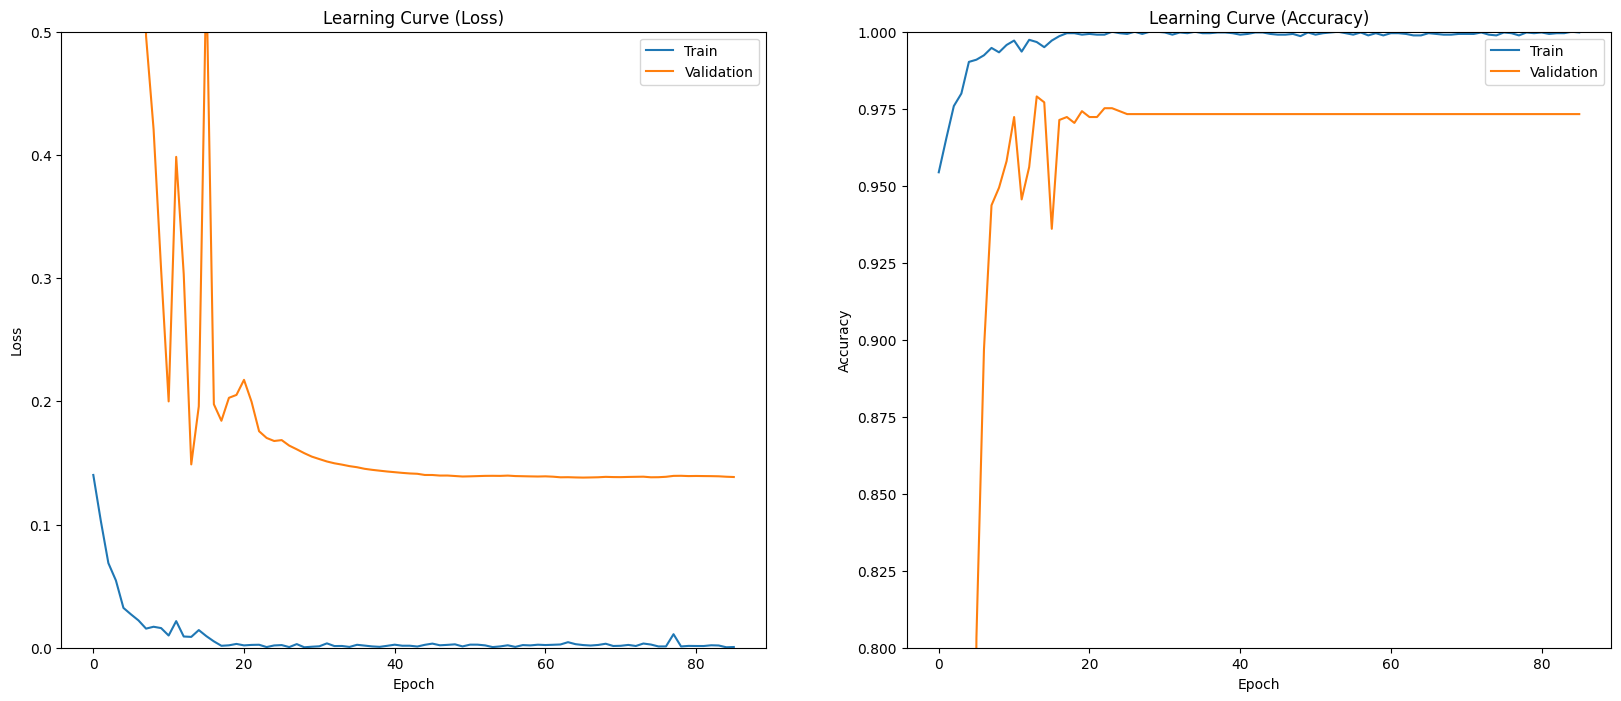

Validation loss: 0.13810081779956818
Validation accuracy: 0.9732569456100464
Test loss: 0.16600468754768372
Test accuracy: 0.9663461446762085


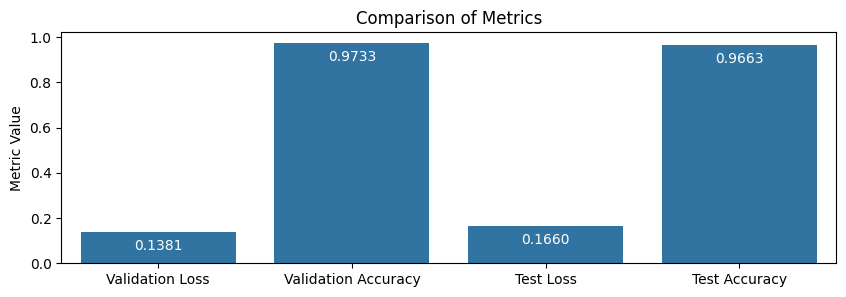

(0.13810081779956818,
 0.9732569456100464,
 0.16600468754768372,
 0.9663461446762085)

In [55]:
# Plotting Learning Curves for our Fine-Tuned MobileNetV2 model
plot_performance(history_finetuned_mobilenetv2)

# Comparing metrics for our Fine-Tuned MobileNetV2 model
compare_metrics(model_pretrained_mobilenetv2)

<a name='9.2.5'></a>
#### VGG16

<a name='9.2.5.1'></a>
##### **Base VGG16**

In [56]:
# Load VGG16 with pre-trained weights
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model_vgg16.trainable = False

# Clear any previous Keras sessions
keras.backend.clear_session()

# Create VGG16 model
model_pretrained_vgg16 = get_pretrained_vgg16()

# Compile the model
model_pretrained_vgg16.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics='binary_accuracy'
)

# Display model summary
model_pretrained_vgg16.summary()

# Train the model
history_vgg16 = model_pretrained_vgg16.fit(
    ds_train,
    batch_size=BATCH,
    epochs=EPOCH,
    validation_data=ds_val,
    callbacks=[early_stopping, plateau],
    steps_per_epoch=(len(train_df) / BATCH),
    validation_steps=(len(val_df) / BATCH)
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

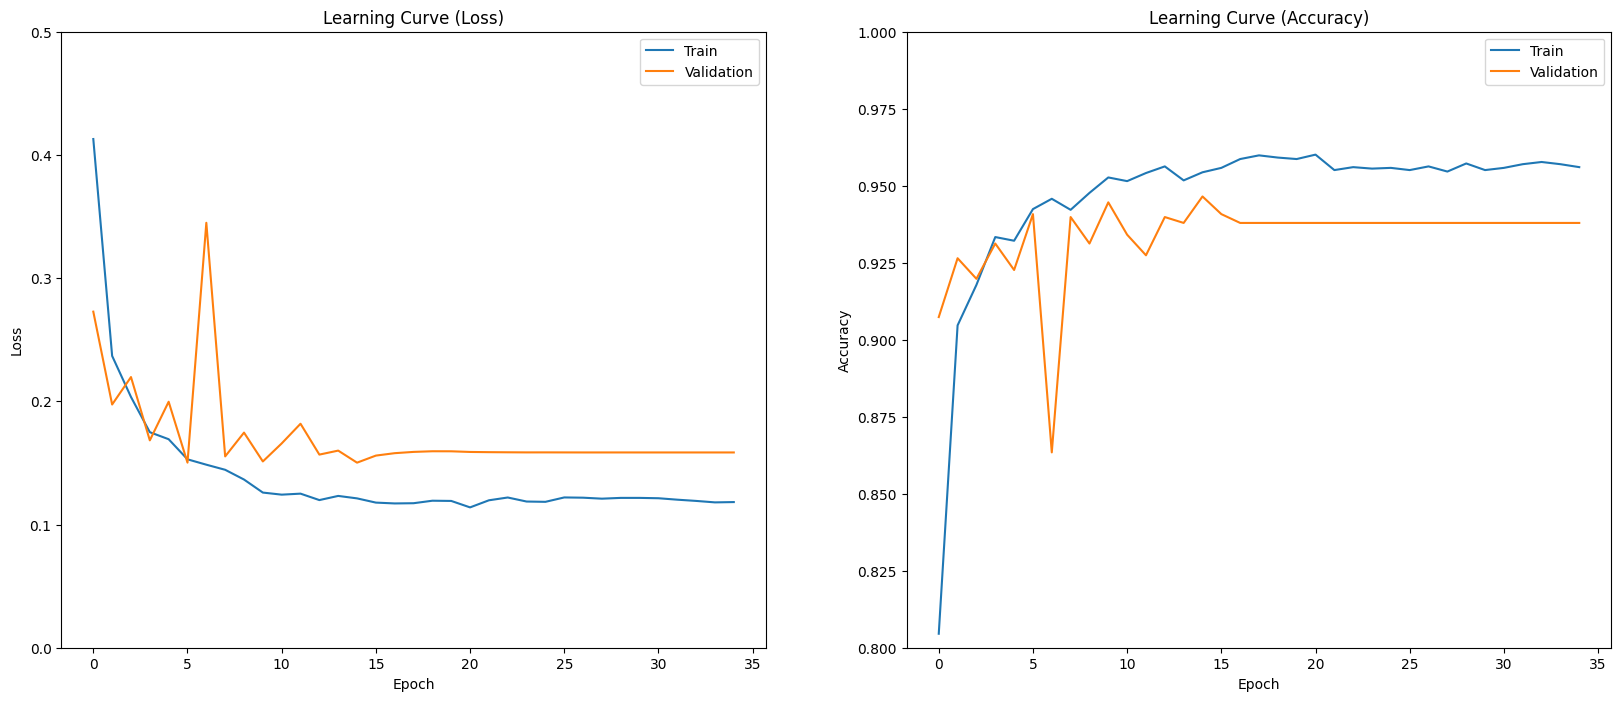

Validation loss: 0.15021081268787384
Validation accuracy: 0.946513831615448
Test loss: 0.17810484766960144
Test accuracy: 0.9342948794364929


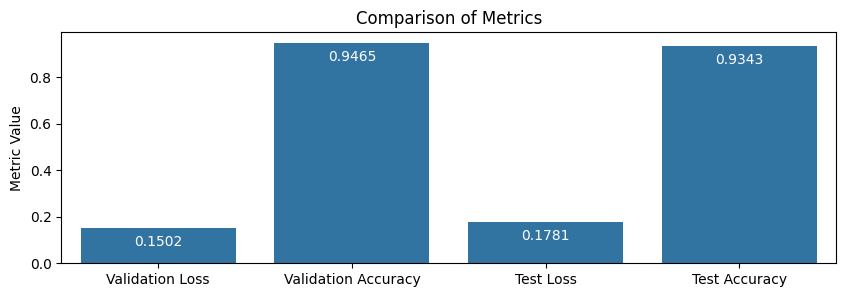

(0.15021081268787384,
 0.946513831615448,
 0.17810484766960144,
 0.9342948794364929)

In [57]:
# Plotting Learning Curves for our base VGG16 model
plot_performance(history_vgg16)

# EComparing metrics for our base VGG16 model
compare_metrics(model_pretrained_vgg16)

<a name='9.2.5.2'></a>
##### **Fine-Tuned VGG16**

In [58]:
# Set base model to trainable
base_model_vgg16.trainable = True

# Unfreezing all 19 layers for fine-tuning gives the best result. I am allowing the model to update the weights for all layers during fine-tuning.
# There are 19 layers in VGG16
for layer in base_model_vgg16.layers[:-19]:  # Adjust the number of layers to unfreeze
    layer.trainable = False

# Clear any previous Keras sessions
keras.backend.clear_session()

# Create VGG16 model
model_pretrained_vgg16 = get_pretrained_vgg16()

# Compile the model with a lower learning rate
model_pretrained_vgg16.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Adjust the learning rate as needed
    metrics='binary_accuracy'
)

# Display the summary of the model
model_pretrained_vgg16.summary()

# Fine-tune the model
history_finetuned_vgg16 = model_pretrained_vgg16.fit(
    ds_train,
    batch_size=BATCH,
    epochs=EPOCH,
    validation_data=ds_val,
    callbacks=[early_stopping, plateau],
    steps_per_epoch=(len(train_df) / BATCH),
    validation_steps=(len(val_df) / BATCH)
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

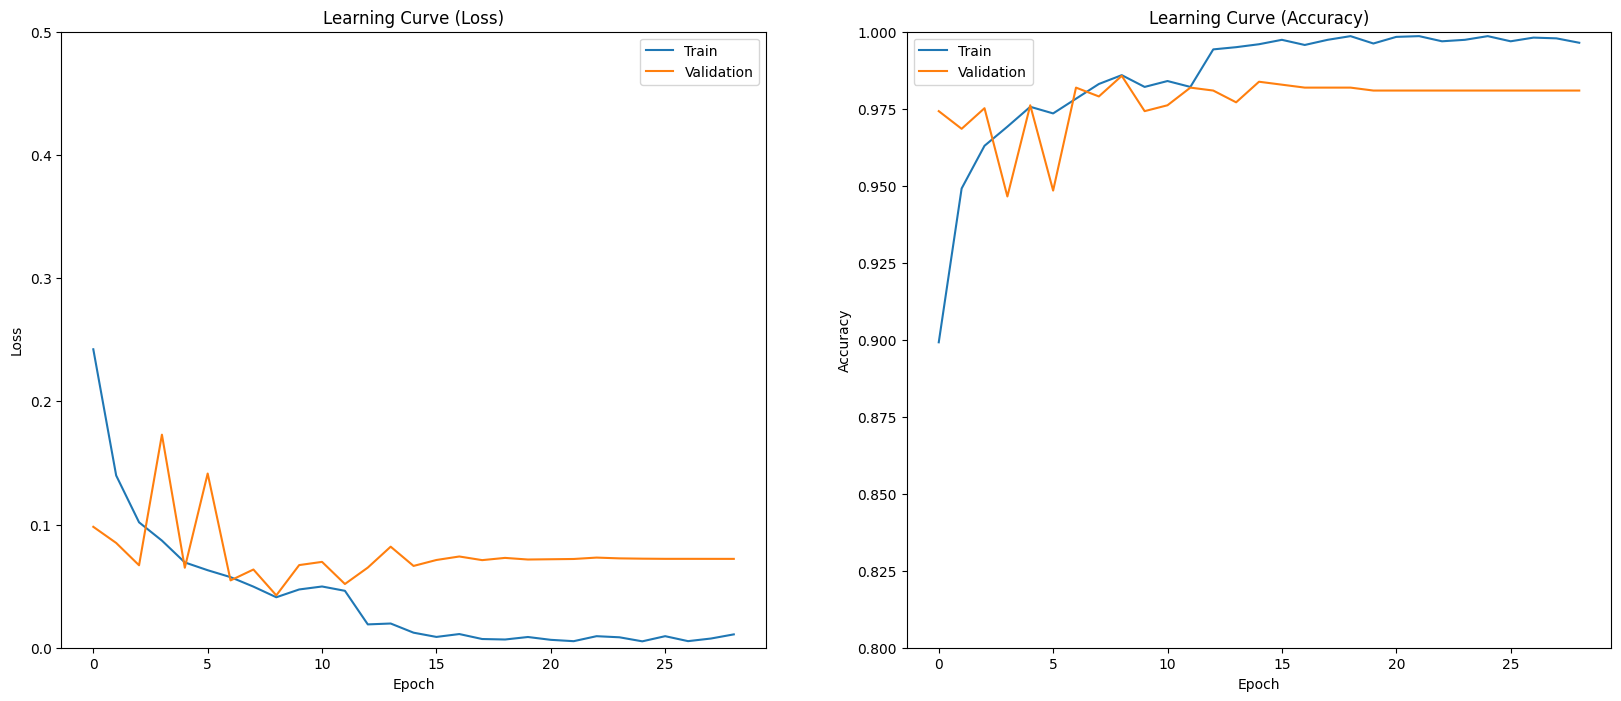

Validation loss: 0.042504146695137024
Validation accuracy: 0.9856733679771423
Test loss: 0.18222516775131226
Test accuracy: 0.9407051205635071


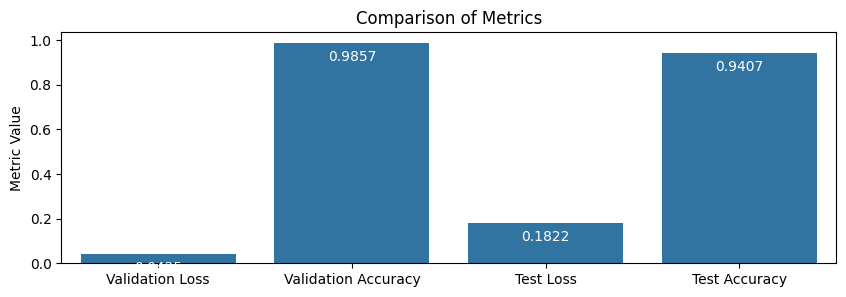

(0.042504146695137024,
 0.9856733679771423,
 0.18222516775131226,
 0.9407051205635071)

In [59]:
# Plotting Learning Curves for our Fine-Tuned VGG16 model
plot_performance(history_finetuned_vgg16)

# Comparing metrics for our Fine-Tuned VGG16 model
compare_metrics(model_pretrained_vgg16)

<a name='10'></a>
## Metrics for our Fine-Tuned/pre-trained models

<a name='10.1'></a>
### Defining model dictionary
Generating dictionaries to encapsulate fine-tuned model information, including model objects and their corresponding training histories captured through callbacks.

In [60]:
fine_tuned_models = {
    'CNN':model,
    'ResNet152V2': model_pretrained_ResNet,
    'DenseNet201': model_pretrained_densenet,
    'InceptionV3': model_pretrained_inception,
    'MobileNetV2': model_pretrained_mobilenetv2,
    'VGG16': model_pretrained_vgg16
}

model_histories = {
    'CNN': history,
    'ResNet152V2': history_finetuned_resnet,
    'DenseNet201': history_finetuned_densenet,
    'InceptionV3': history_finetuned_inception,
    'MobileNetV2': history_finetuned_mobilenetv2,
    'VGG16': history_finetuned_vgg16,
}

<a name='10.2'></a>
### Comparing Confusion matrices & Classification reports


Evaluating CNN:


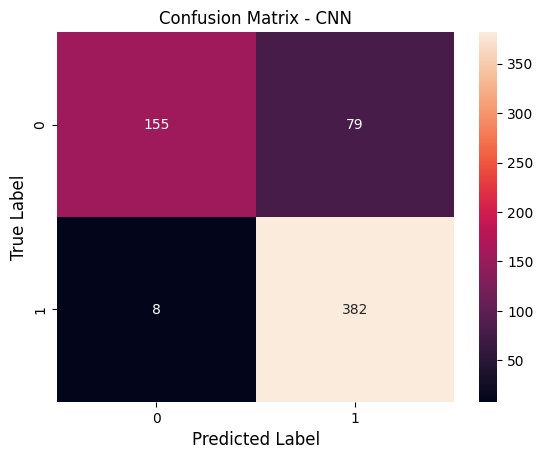

Classification Report - CNN:
              precision    recall  f1-score   support

           0       0.95      0.66      0.78       234
           1       0.83      0.98      0.90       390

    accuracy                           0.86       624
   macro avg       0.89      0.82      0.84       624
weighted avg       0.87      0.86      0.85       624


Evaluating ResNet152V2:


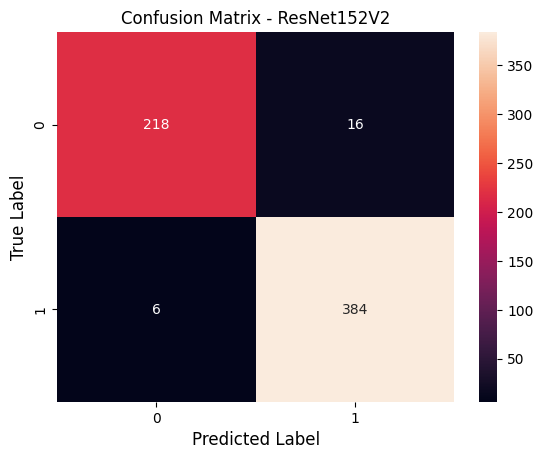

Classification Report - ResNet152V2:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       234
           1       0.96      0.98      0.97       390

    accuracy                           0.96       624
   macro avg       0.97      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624


Evaluating DenseNet201:


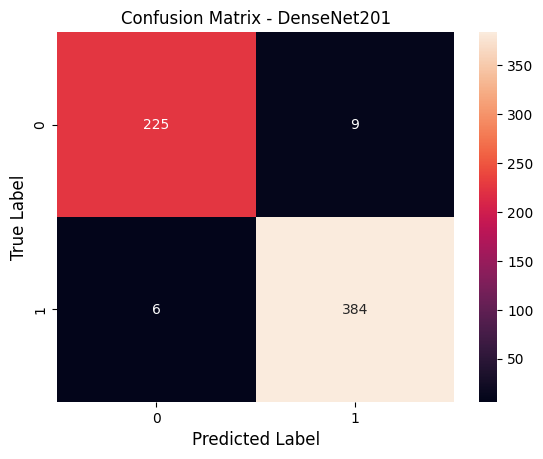

Classification Report - DenseNet201:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       234
           1       0.98      0.98      0.98       390

    accuracy                           0.98       624
   macro avg       0.98      0.97      0.97       624
weighted avg       0.98      0.98      0.98       624


Evaluating InceptionV3:


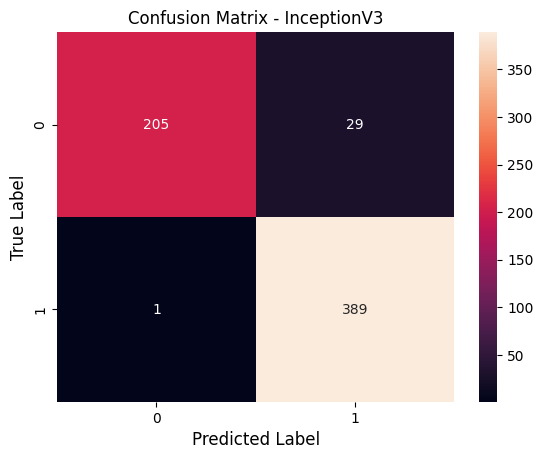

Classification Report - InceptionV3:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93       234
           1       0.93      1.00      0.96       390

    accuracy                           0.95       624
   macro avg       0.96      0.94      0.95       624
weighted avg       0.95      0.95      0.95       624


Evaluating MobileNetV2:


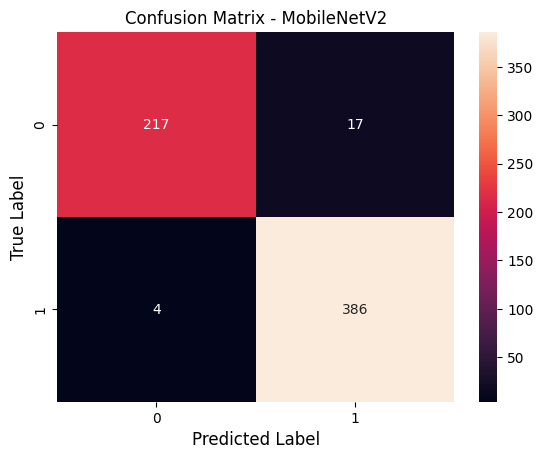

Classification Report - MobileNetV2:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       234
           1       0.96      0.99      0.97       390

    accuracy                           0.97       624
   macro avg       0.97      0.96      0.96       624
weighted avg       0.97      0.97      0.97       624


Evaluating VGG16:


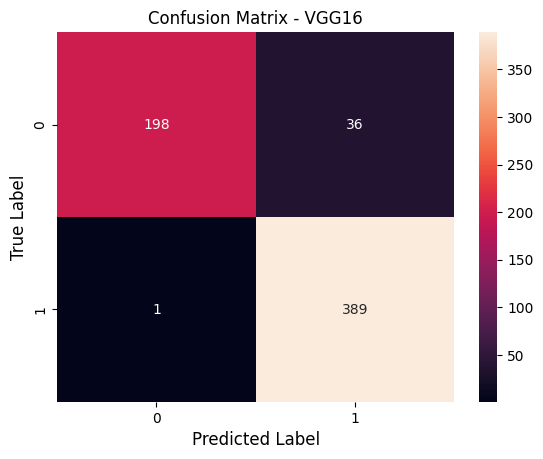

Classification Report - VGG16:
              precision    recall  f1-score   support

           0       0.99      0.85      0.91       234
           1       0.92      1.00      0.95       390

    accuracy                           0.94       624
   macro avg       0.96      0.92      0.93       624
weighted avg       0.95      0.94      0.94       624



In [61]:
metrics_dict = {}

for model_name, fine_tuned_model in fine_tuned_models.items():
    print(f"\nEvaluating {model_name}:")
    
    # Reset dataset and get true labels
    ds_test.reset()
    Y_test = df_test['class'].copy().map(num_label).astype('int')

    # Get predictions
    predictions = fine_tuned_model.predict(ds_test, steps=len(ds_test), verbose=0)
    pred_labels = np.where(predictions > 0.5, 1, 0)

    # Compute accuracy
    accuracy = accuracy_score(Y_test, pred_labels)
    metrics_dict[model_name] = {'Accuracy': accuracy}

    # Display confusion matrix
    confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
    sns.heatmap(confusion_matrix, annot=True, fmt="d")
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Display classification report
    classification_rep = metrics.classification_report(Y_test, pred_labels, labels=[0, 1])
    print(f"Classification Report - {model_name}:\n{classification_rep}")

<a name='10.3'></a>
### Comparing ROC-AUC Curves & Creating metrics dictionary

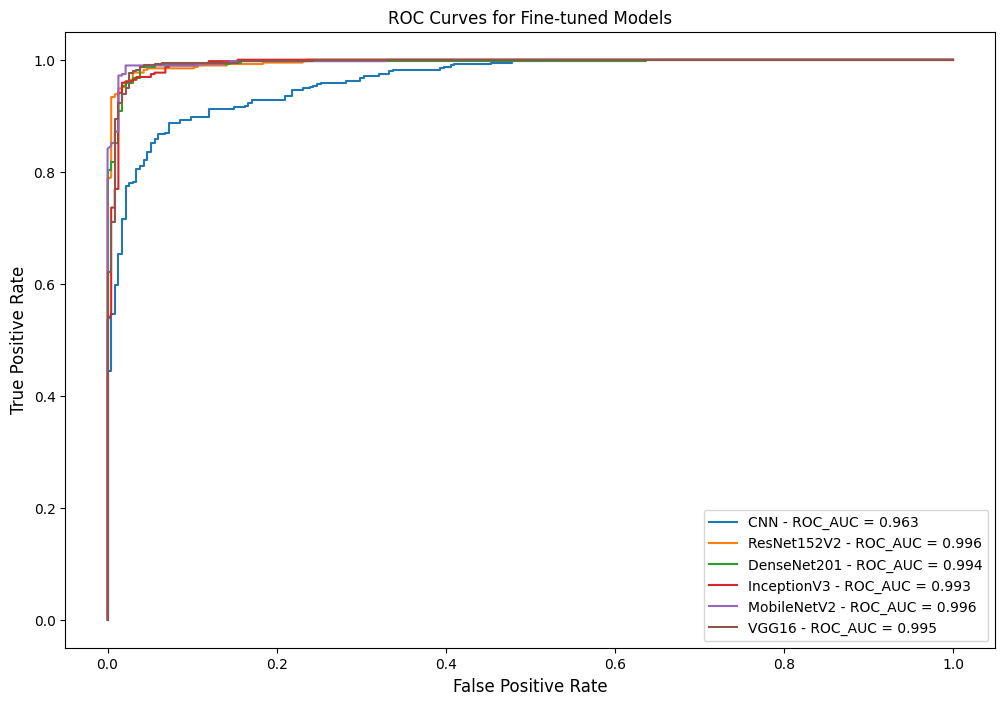

In [62]:
# Receiver Operating Characteristic - Area Under the Curve

metrics_df = []

# Plot ROC curve
plt.figure(figsize=(12, 8))

for model_name, fine_tuned_model in fine_tuned_models.items():
    
    # Reset dataset and get true labels
    ds_test.reset()
    Y_test = df_test['class'].copy().map(num_label).astype('int')

    # Get predictions
    predictions = fine_tuned_model.predict(ds_test, steps=len(ds_test), verbose=0)
    pred_labels = np.where(predictions > 0.5, 1, 0)

    # Compute accuracy
    accuracy = accuracy_score(Y_test, pred_labels)

    # Display confusion matrix
    confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)

    # Display classification report
    classification_rep = metrics.classification_report(Y_test, pred_labels, labels=[0, 1], output_dict=True)

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(Y_test, predictions)
    roc_auc = auc(fpr, tpr)

    # Display ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} - ROC_AUC = %0.3f' % roc_auc)

    # Save metrics to DataFrame
    metrics_df.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Confusion_Matrix': confusion_matrix,
        'Classification_Report': classification_rep,
        'ROC_AUC': roc_auc
    })

plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right")
plt.title("ROC Curves for Fine-tuned Models")
plt.show()

<a name='10.4'></a>
### Comparing Accuracies and ROC-AUC scores

In [63]:
# Display overall metrics in DataFrame
metrics_df = pd.DataFrame(metrics_df)
pd.set_option("display.max_colwidth", None)
print(metrics_df.columns)

Index(['Model', 'Accuracy', 'Confusion_Matrix', 'Classification_Report',
       'ROC_AUC'],
      dtype='object')


In [64]:
# Extract precision, recall, and f1-score directly from the classification report
metrics_df['Precision_Pneumonia'] = metrics_df['Classification_Report'].apply(lambda x: x['1']['precision'])
metrics_df['Recall_Pneumonia'] = metrics_df['Classification_Report'].apply(lambda x: x['1']['recall'])
metrics_df['F1_Pneumonia'] = metrics_df['Classification_Report'].apply(lambda x: x['1']['f1-score'])
metrics_df['Precision_Normal'] = metrics_df['Classification_Report'].apply(lambda x: x['0']['precision'])
metrics_df['Recall_Normal'] = metrics_df['Classification_Report'].apply(lambda x: x['0']['recall'])
metrics_df['F1_Normal'] = metrics_df['Classification_Report'].apply(lambda x: x['0']['f1-score'])

# Display the DataFrame
# metrics_df

In [65]:
# Focusing more on recall for Pneumonia
metrics_df[['Model', 'Recall_Pneumonia', 'Accuracy', 'ROC_AUC']].sort_values(by=['Recall_Pneumonia', 'Accuracy', 'ROC_AUC'], ascending=[False, False, False]).reset_index(drop=True)

Model  Recall_Pneumonia  Accuracy   ROC_AUC
0  InceptionV3          0.997436  0.951923  0.993497
1        VGG16          0.997436  0.940705  0.994675
2  MobileNetV2          0.989744  0.966346  0.996296
3  DenseNet201          0.984615  0.975962  0.994258
4  ResNet152V2          0.984615  0.964744  0.995579
5          CNN          0.979487  0.860577  0.963259

In [66]:
# Focusing more on Accuracy score
metrics_df[['Model', 'Accuracy', 'Recall_Pneumonia', 'ROC_AUC']].sort_values(by=['Accuracy', 'Recall_Pneumonia', 'ROC_AUC'], ascending=[False, False, False]).reset_index(drop=True)

Model  Accuracy  Recall_Pneumonia   ROC_AUC
0  DenseNet201  0.975962          0.984615  0.994258
1  MobileNetV2  0.966346          0.989744  0.996296
2  ResNet152V2  0.964744          0.984615  0.995579
3  InceptionV3  0.951923          0.997436  0.993497
4        VGG16  0.940705          0.997436  0.994675
5          CNN  0.860577          0.979487  0.963259

In medicle domains, class imbalance is common and accuracy is not the best measure to evaluate a model.  
Our models VGG16, ResNet152-V2 and Inception-V3 perform best.   
We can select a model by sitting with a domain expert and checking if lime is able to justify a model.

In [67]:
# # Focusing more on ROC_AUC score
metrics_df[['Model', 'ROC_AUC', 'Accuracy', 'Recall_Pneumonia']].sort_values(by=[ 'ROC_AUC', 'Accuracy', 'Recall_Pneumonia'], ascending=[False, False, False]).reset_index(drop=True)

Model   ROC_AUC  Accuracy  Recall_Pneumonia
0  MobileNetV2  0.996296  0.966346          0.989744
1  ResNet152V2  0.995579  0.964744          0.984615
2        VGG16  0.994675  0.940705          0.997436
3  DenseNet201  0.994258  0.975962          0.984615
4  InceptionV3  0.993497  0.951923          0.997436
5          CNN  0.963259  0.860577          0.979487

<a name='10.5'></a>
### Choosing the best model

Here I am ranking all models on basis of their recall for class 1 (Pneumonia), Accuracy on test data and ROC_AUC scores

In [68]:
# Normalize the scores
scaler = MinMaxScaler()
metrics_df['Recall_Pneumonia_Score'] = scaler.fit_transform(metrics_df[['Recall_Pneumonia']])
metrics_df['Accuracy_Score'] = scaler.fit_transform(metrics_df[['Accuracy']])
metrics_df['ROC_AUC_Score'] = scaler.fit_transform(metrics_df[['ROC_AUC']])

# Sum the normalized scores to get a total score for each model
metrics_df['Total_Score'] = metrics_df['Recall_Pneumonia_Score'] + metrics_df['Accuracy_Score'] + metrics_df['ROC_AUC_Score']

# Assign ranks based on total score
metrics_df['Rank'] = metrics_df['Total_Score'].rank(ascending=False)

# Sort based on the total score to find the best model
best_model_df = metrics_df.sort_values(by='Rank').reset_index(drop=True)

# Display the sorted DataFrame with total scores and ranks
best_model_df[['Model', 'Total_Score', 'Rank']]

Model  Total_Score  Rank
0  InceptionV3     2.706924   1.0
1        VGG16     2.645357   2.0
2  MobileNetV2     2.488095   3.0
3  DenseNet201     2.224023   4.0
4  ResNet152V2     2.166767   5.0
5          CNN     0.000000   6.0

* All fine-tuned models have a ROC-AUC score above 99%, so we can give least importance to ROC_AUC for model selection
* Recall is out most important metric and InceptionV3 and VGG16 perform best having score above 99%
* Accuracy wise, InceptionV3 and VGG16 perform worse compared to other fine-tuned models but still have decent scores(95.19% & 94.07% respectively)

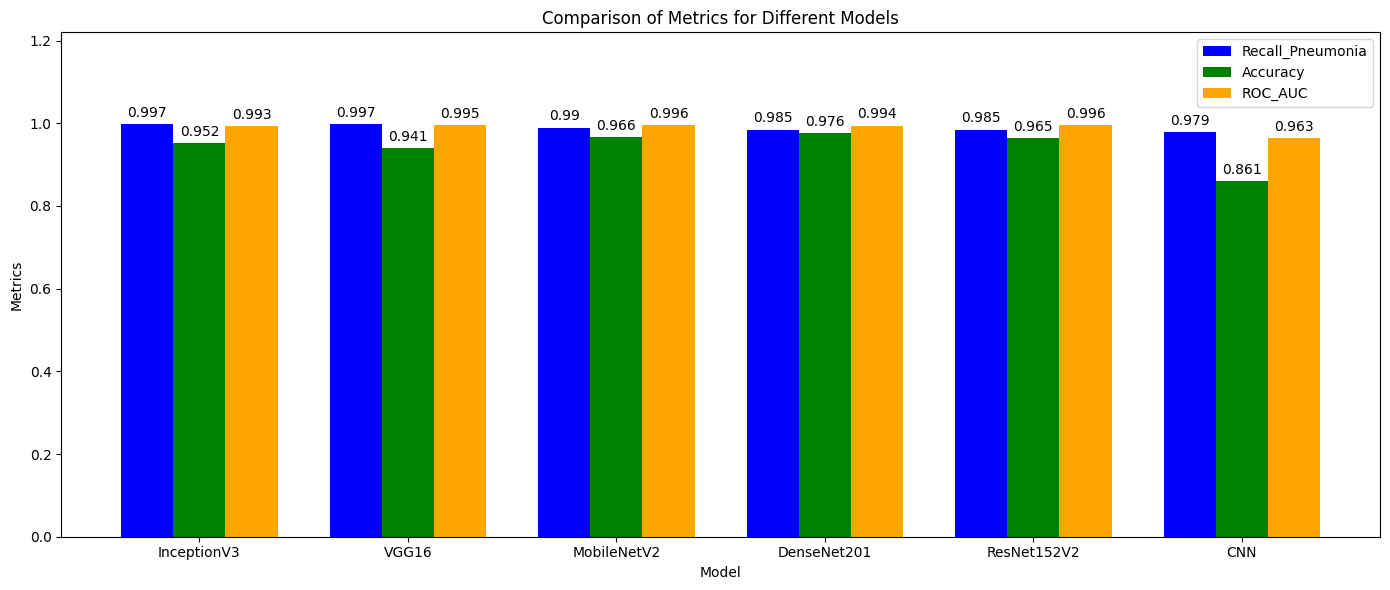

In [69]:
# Grouped bar plot with labels
width = 0.25
x = np.arange(len(metrics_df['Model']))

fig, ax = plt.subplots(figsize=(14, 6))
rects1 = ax.bar(x - width, best_model_df['Recall_Pneumonia'], width, label='Recall_Pneumonia', color='blue')
rects2 = ax.bar(x, best_model_df['Accuracy'], width, label='Accuracy', color='green')
rects3 = ax.bar(x + width, best_model_df['ROC_AUC'], width, label='ROC_AUC', color='orange')

ax.set_xlabel('Model')
ax.set_ylabel('Metrics')
ax.set_title('Comparison of Metrics for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(best_model_df['Model'])
ax.set_ylim(0, 1.22)
ax.legend()

# Add labels with values on top of the bars
add_value_labels(ax, rects1)
add_value_labels(ax, rects2)
add_value_labels(ax, rects3)

plt.tight_layout()
plt.show()

I confirm that InceptionV3 performs best for the current problem statement. We will use this trained model for deployment

<a name='11'></a>
## Lime Predictions and explainations

LIME is a tool that helps us understand and make sense of the decisions made by complex computer models.  
Think of it as a translator that makes the black-box nature of models more transparent, helping us trust and understand their predictions.

**L** - Local (How we get the explainations)  
**I** - Interpretable (Explainations are simple for a human to understand)  
**M** - Model-Agnostic (Lime treats the model as a black-box: hence works for any model)  
**E** - Explainations (Making decision-making process more transparent and understandable)


Explaining predictions for CNN:


  0%|          | 0/1000 [00:00<?, ?it/s]

LIME Explanation as List:
[(1, -0.2621870548654171), (27, 0.1249839839480273), (15, 0.1207258323253031), (2, -0.08864771863547934), (3, 0.08362816874200207), (36, -0.06703069061631116), (10, -0.05843972161739692), (16, -0.057083431216275), (34, 0.050327246261821425), (30, 0.039550753514423116), (38, 0.03495775175413404), (12, 0.03430756172789661), (31, -0.03349127719557662), (13, -0.03278191715777796), (11, -0.028429242159391983), (29, 0.02786055664049637), (39, 0.027416042644960958), (18, -0.026904268205014455), (5, 0.0268402590957162), (26, 0.02657991887291453), (14, -0.02322359079661769), (19, 0.020782738850488112), (17, 0.019947221975366643), (28, 0.01849852028000478), (23, -0.01820296882165342), (25, 0.01778487557958064), (21, -0.01633939494251411), (22, -0.01083226755796025), (20, 0.010481191136608147), (33, 0.010329230190250548), (32, -0.008872709752932096), (35, -0.007214381649041832), (24, 0.006901965392003974), (4, 0.0062278942647308235), (0, -0.005415424888954377), (7, 0.003

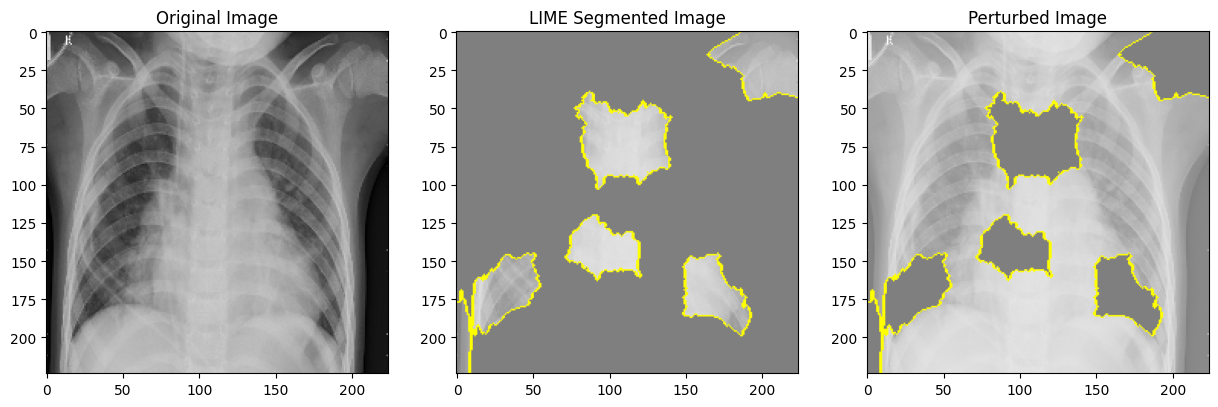

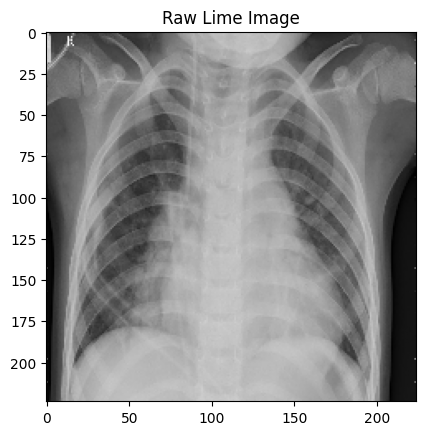

Superpixel Positions:
[[ 4  4  4 ...  3  3  3]
 [ 4  4  4 ...  3  3  3]
 [ 4  4  4 ...  3  3  3]
 ...
 [30 30 30 ... 39 39 39]
 [30 30 30 ... 39 39 39]
 [30 30 30 ... 39 39 39]]


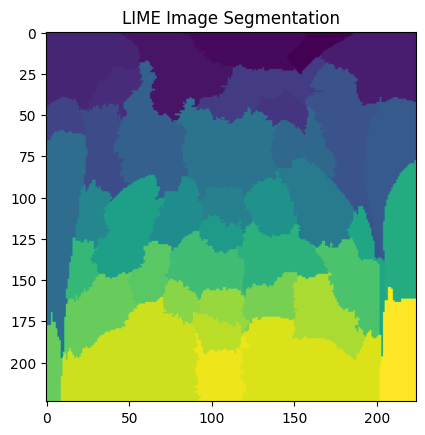


Explaining predictions for ResNet152V2:


  0%|          | 0/1000 [00:00<?, ?it/s]

LIME Explanation as List:
[(12, -0.0004330521679721487), (15, -0.00037330150557037515), (36, 0.0003443749178824951), (30, 0.00034117274405133876), (14, 0.00030665357958360815), (3, 0.0003007833393225725), (9, -0.0002879038378566291), (34, -0.00026315151951997466), (32, 0.000229962446326803), (19, 0.00020732059857098424), (38, 0.00019406267811478842), (17, -0.00018607608822859609), (37, 0.00017178487684794283), (21, -0.0001500617298818612), (27, 0.00014385571774812525), (23, 0.0001372471369380253), (8, 0.00012986423923277304), (6, -0.0001179437987679953), (2, -0.00010662251453782674), (31, -8.790309692968489e-05), (4, 8.752058149130314e-05), (28, -8.60922970406896e-05), (18, 7.793274779817372e-05), (35, -7.544256151426053e-05), (16, -7.185916462013797e-05), (33, 7.024889752817333e-05), (20, -6.969301334362163e-05), (22, 6.239091796027877e-05), (26, -6.030801564740107e-05), (29, -5.176173762556024e-05), (1, 4.9136935377923634e-05), (5, 4.912154378844837e-05), (25, -4.387791913745213e-05)

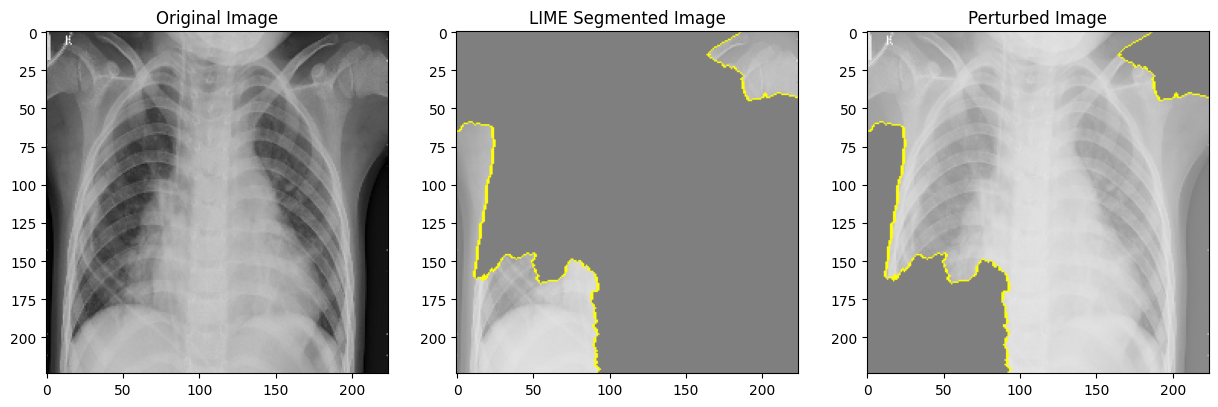

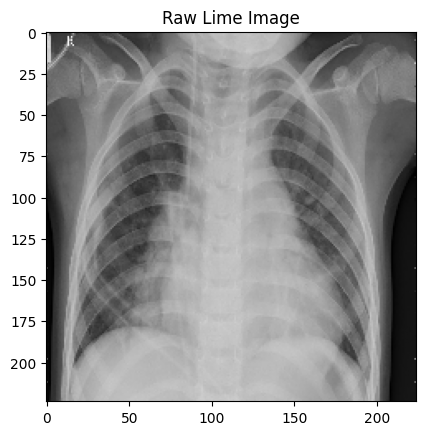

Superpixel Positions:
[[ 4  4  4 ...  3  3  3]
 [ 4  4  4 ...  3  3  3]
 [ 4  4  4 ...  3  3  3]
 ...
 [30 30 30 ... 39 39 39]
 [30 30 30 ... 39 39 39]
 [30 30 30 ... 39 39 39]]


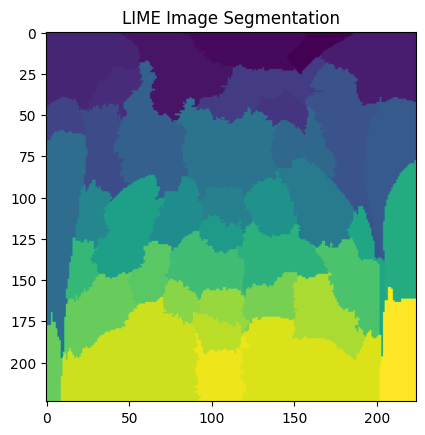


Explaining predictions for DenseNet201:


  0%|          | 0/1000 [00:00<?, ?it/s]

LIME Explanation as List:
[(38, 9.02320113989118e-06), (30, 8.173877844900713e-06), (39, 6.426388118730721e-06), (16, 6.3284933582418214e-06), (22, -5.954957538371787e-06), (37, 5.531652941068972e-06), (17, 5.4925482599441726e-06), (6, 5.350072064511848e-06), (25, 5.2068514211181915e-06), (2, -5.165471224943022e-06), (21, 5.113117073056077e-06), (12, -5.005925028530096e-06), (31, -4.732951672557902e-06), (1, -4.646435836607415e-06), (19, 4.449703786092044e-06), (29, 4.379478293261063e-06), (7, -4.372055044224473e-06), (27, -4.1275930654144835e-06), (36, 4.0990070676102444e-06), (32, -3.712346147812051e-06), (23, -3.3997161464884646e-06), (8, -3.2373695009582365e-06), (14, -3.1911579878846867e-06), (34, -3.180496377775482e-06), (28, -3.1789320893113795e-06), (0, -3.1445347978175304e-06), (35, 3.003116062680685e-06), (11, -2.849330995647866e-06), (9, -2.683395942529018e-06), (5, -2.1923658107919587e-06), (15, -1.7471887550000309e-06), (4, 1.5641071281735342e-06), (18, -1.338107528447873e

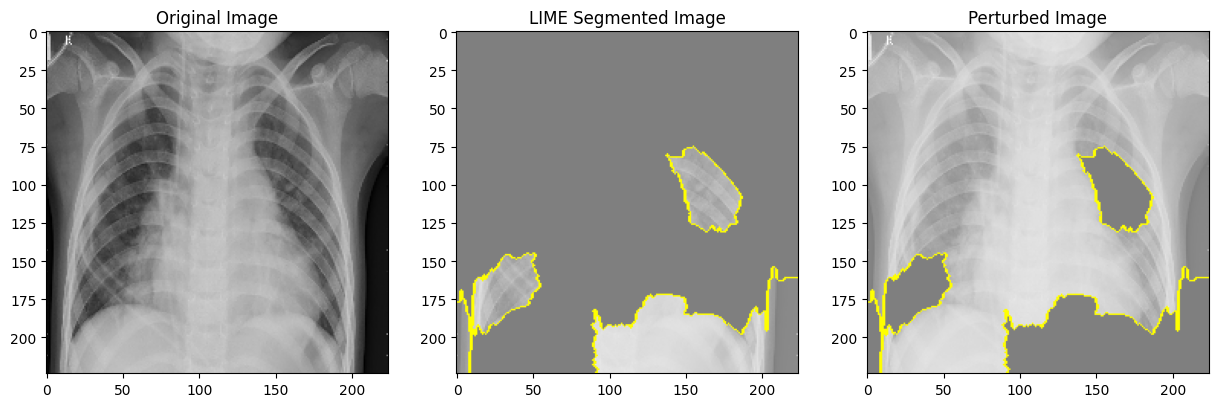

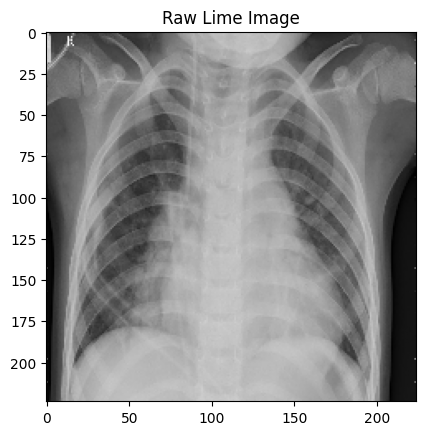

Superpixel Positions:
[[ 4  4  4 ...  3  3  3]
 [ 4  4  4 ...  3  3  3]
 [ 4  4  4 ...  3  3  3]
 ...
 [30 30 30 ... 39 39 39]
 [30 30 30 ... 39 39 39]
 [30 30 30 ... 39 39 39]]


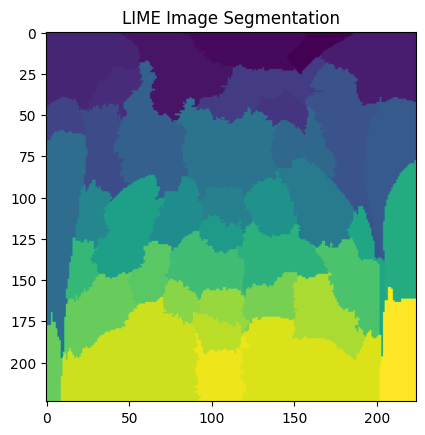


Explaining predictions for InceptionV3:


  0%|          | 0/1000 [00:00<?, ?it/s]

LIME Explanation as List:
[(4, 2.13988418557963e-05), (3, 1.3676097514054558e-05), (1, -1.1651508893627652e-05), (7, -1.0295541660303457e-05), (16, -8.892774312272888e-06), (12, -8.482722630703883e-06), (30, -6.763729944158749e-06), (22, -6.595732937472873e-06), (15, -6.093395373712433e-06), (11, 5.505822739453166e-06), (10, 4.807490990886892e-06), (17, 4.257293679903644e-06), (25, 4.039063364263885e-06), (36, -4.0134903110221735e-06), (13, -3.02503841683211e-06), (26, 2.9308886835795127e-06), (27, 2.929324523467126e-06), (9, -2.9109744564377626e-06), (38, 2.682977149593434e-06), (14, -2.625055107841375e-06), (0, -2.5330685577243785e-06), (18, 2.4191023984259274e-06), (20, 1.931235168471314e-06), (21, 1.8210416168068783e-06), (2, -1.803533999622903e-06), (19, -1.7584271550956873e-06), (6, 1.4376644030094465e-06), (5, -1.2279074593556456e-06), (37, -1.1834852886453997e-06), (31, -1.1257873600440239e-06), (29, -7.566539293299256e-07), (8, 6.79041737749216e-07), (35, -6.333952268676335e-0

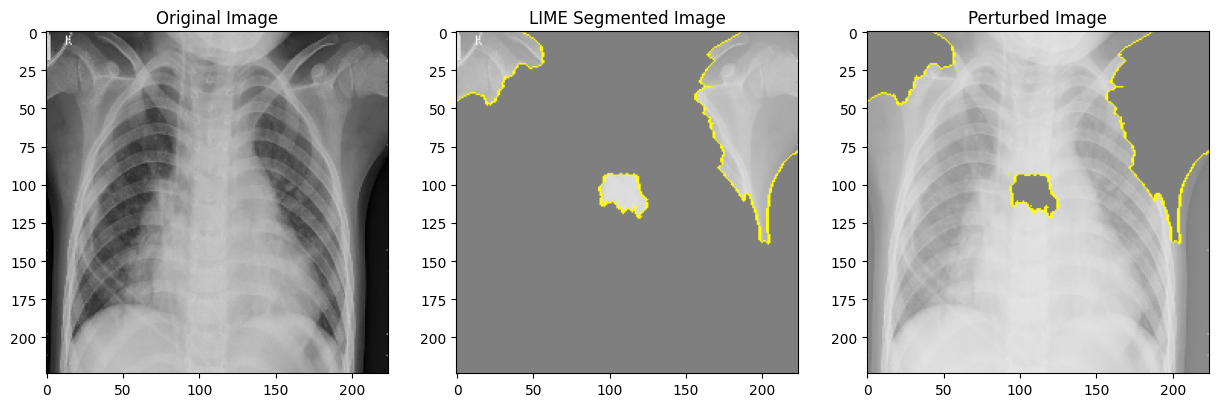

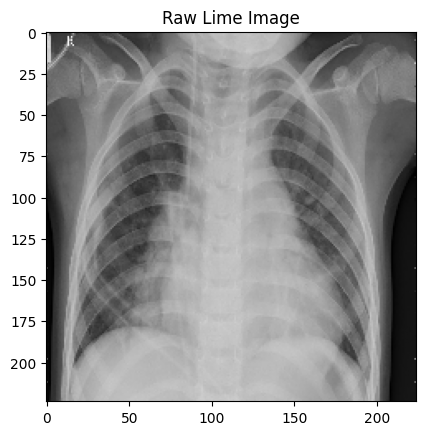

Superpixel Positions:
[[ 4  4  4 ...  3  3  3]
 [ 4  4  4 ...  3  3  3]
 [ 4  4  4 ...  3  3  3]
 ...
 [30 30 30 ... 39 39 39]
 [30 30 30 ... 39 39 39]
 [30 30 30 ... 39 39 39]]


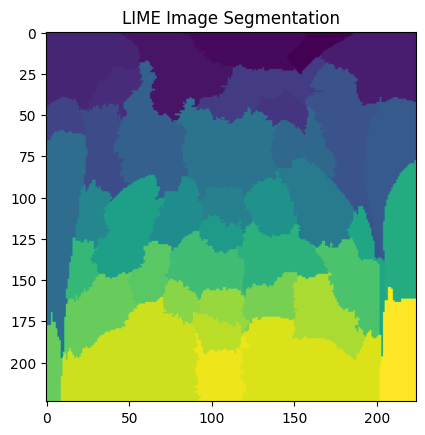


Explaining predictions for MobileNetV2:


  0%|          | 0/1000 [00:00<?, ?it/s]

LIME Explanation as List:
[(4, 0.03448700661820502), (3, 0.029725677058083877), (23, 0.007464482777957287), (5, 0.006249661652445726), (11, 0.005562659595973198), (38, 0.005384101115056925), (19, 0.005318239881748929), (26, 0.005298932145126304), (24, 0.005009360616199689), (34, 0.004752392793302518), (20, 0.004581560472245954), (30, 0.003345957892899463), (16, -0.0033287248931183765), (2, 0.0031793209896969796), (36, 0.0028607854066705456), (35, -0.0028079332935838025), (10, 0.0027113521233773246), (17, 0.0026904616036649088), (39, 0.0026615466077852187), (37, 0.0025761756169645064), (28, 0.0025080153561583634), (13, 0.0024883425128125356), (14, -0.002366747329977452), (18, 0.002073260723008886), (31, -0.00166998465558491), (7, -0.0015792767807030065), (1, -0.001400334752683177), (21, 0.0013820402582146282), (9, -0.0012873887343068321), (33, 0.0012842171600303091), (6, 0.0012334943594127013), (25, -0.001156858020625615), (12, 0.0011274398660438593), (22, 0.0009494087942105422), (27, -

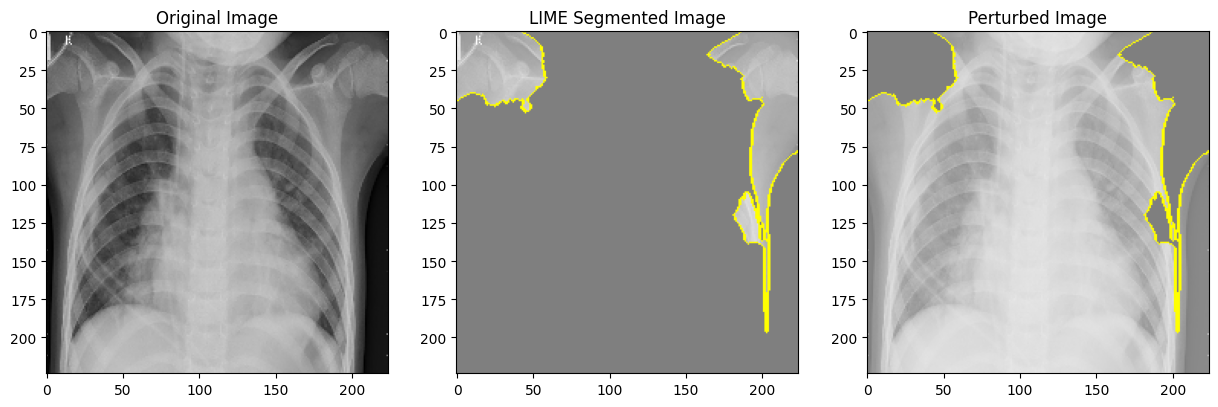

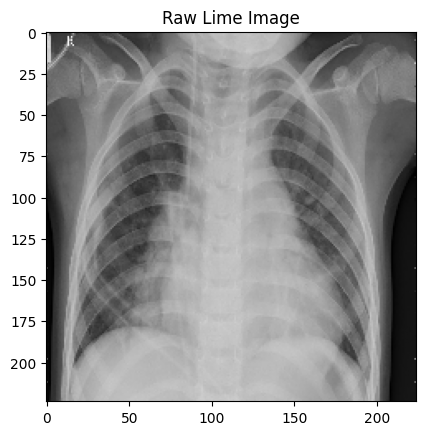

Superpixel Positions:
[[ 4  4  4 ...  3  3  3]
 [ 4  4  4 ...  3  3  3]
 [ 4  4  4 ...  3  3  3]
 ...
 [30 30 30 ... 39 39 39]
 [30 30 30 ... 39 39 39]
 [30 30 30 ... 39 39 39]]


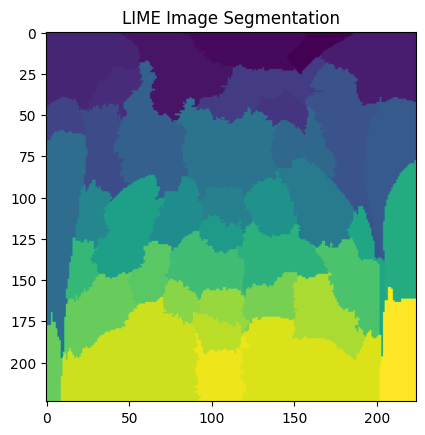


Explaining predictions for VGG16:


  0%|          | 0/1000 [00:00<?, ?it/s]

LIME Explanation as List:
[(36, -0.029420366210269288), (37, -0.022622327798838996), (28, -0.021260278957580515), (14, -0.01671653121388371), (1, -0.014919422230116405), (9, -0.013826718764722128), (4, 0.0116992250593841), (11, -0.010530675870117552), (10, -0.01025277992016538), (8, -0.009774844255583882), (2, -0.008932507385273101), (5, 0.008461493073389012), (19, -0.007800863699520583), (30, -0.006297978470843158), (20, -0.006216774282963216), (18, 0.005410405187452975), (6, -0.004472495042107481), (3, -0.0038975289980640445), (26, -0.003817846324766643), (0, -0.003816082085460639), (12, -0.003704040389106111), (34, 0.003573366478193571), (31, -0.0034589287773166156), (33, -0.003169673132341241), (27, -0.002692799896383894), (22, 0.0022850061083084057), (13, -0.0022543571076810267), (16, -0.0022126472137272207), (38, 0.002192974472930289), (23, -0.0019556319061043667), (17, 0.00189958220124892), (7, -0.0018116300918217209), (25, 0.0015664312391638548), (21, -0.0013717634175388442), (

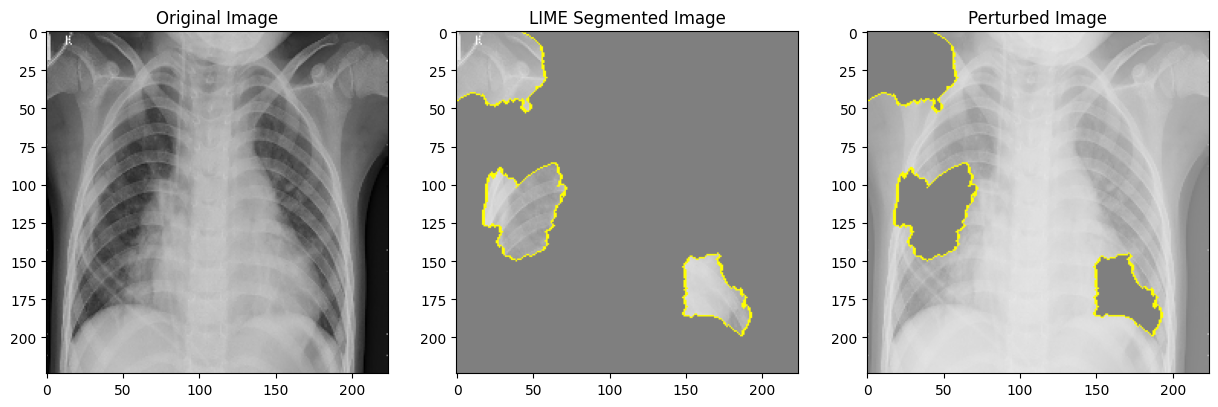

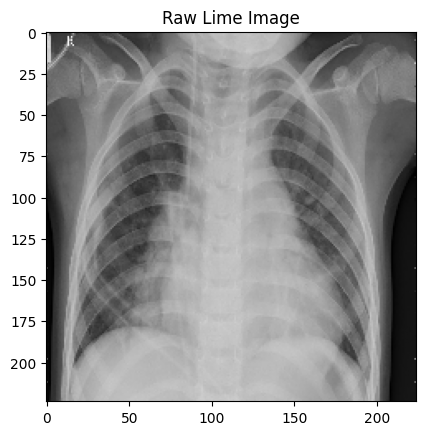

Superpixel Positions:
[[ 4  4  4 ...  3  3  3]
 [ 4  4  4 ...  3  3  3]
 [ 4  4  4 ...  3  3  3]
 ...
 [30 30 30 ... 39 39 39]
 [30 30 30 ... 39 39 39]
 [30 30 30 ... 39 39 39]]


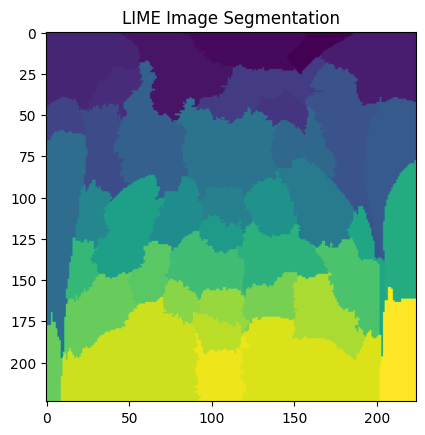

In [70]:
# Using our dictionary "fine_tuned_models" to loop through all models and appy lime
for model_name, fine_tuned_model in fine_tuned_models.items():
    print(f"\nExplaining predictions for {model_name}:")
    segmented_img, explanation = explain_prediction_lime(fine_tuned_model, image_path, class_index=0)

<a name='12'></a>
## Saving the fine-tuned models on disk

In [71]:
# Calculating the Epoch number that gives the best metrics after early stopping, using our dictionary "model_histories"
best_epochs = find_best_epochs(model_histories)

# Using our dictionary "fine_tuned_models" to loop through all models and save them with the best epochs
for model_name, fine_tuned_model in fine_tuned_models.items():
    
    # Retrieve the best epoch for the current model
    best_epoch = best_epochs[model_name]
    
    # Save the model with the best epoch
    fine_tuned_model.save(f'Saved_models/{model_name}_{best_epoch}_{EPOCH}.h5')
    print(f"Saving {model_name}_{best_epoch}_{EPOCH} inside the Saved_models folder")

# loaded_model = load_model(f'Saved_models/{model_name}_{EPOCH}.h5')

Saving CNN_14_100 inside the Saved_models folder
Saving ResNet152V2_14_100 inside the Saved_models folder
Saving DenseNet201_4_100 inside the Saved_models folder
Saving InceptionV3_8_100 inside the Saved_models folder
Saving MobileNetV2_66_100 inside the Saved_models folder
Saving VGG16_9_100 inside the Saved_models folder


<a name='13'></a>
## Refrences:

1. https://www.tensorflow.org/guide/keras/transfer_learning
2. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
3. https://keras.io/api/applications/
4. https://keras.io/api/applications/resnet/#resnet152v2-function
5. https://keras.io/api/applications/vgg/
6. https://keras.io/api/applications/mobilenet/
7. https://keras.io/api/applications/inceptionv3/
8. https://keras.io/api/applications/densenet/
9. https://github.com/marcotcr/lime?tab=readme-ov-file
10. https://www.youtube.com/watch?v=hUnRCxnydCc
11. https://lime-ml.readthedocs.io/en/latest/

<a name='14'></a>
## The END

In [72]:
# Time taken to run the entire notebook/ Notebook Execution Time

end_time = time.time()

result = calculate_execution_time(start_time, end_time)
print(result)

Execution time: 9 hours, 26 minutes, and 36.37 seconds


**My observations :-**  
**Note:** Achieving better validation metrics but poorer test metrics is known as overfitting, while the opposite is known as underfitting.
* Unfreezing more layers and implementing lenient callbacks, encouraging additional training epochs, resulted in overfitting. 
* Attempting training with strict callbacks and more unfrozen layers led to underfitting.  
* Subsequently, I experimented with lenient callbacks and fewer unfrozen layers, still observing underfitting/overfitting.
* After investing over **150 hours in training** with lenient callbacks, I determined the optimal number of unfrozen layers for each model, achieving the best metrics and preventing overfitting.